### 한글 폰트 설치

In [46]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum

# 시스템에 있는 폰트를 읽어서 cache 정보를 만드는 유틸리티
!sudo fc-cache -fv

# removing matplotlib cache
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and direc

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus = False)

In [3]:
import pandas as pd

In [4]:
train=pd.read_csv("/content/drive/MyDrive/AI를 위한 머신러닝/train.csv")
test=pd.read_csv("/content/drive/MyDrive/AI를 위한 머신러닝/test.csv")
train_dataset=pd.read_csv("/content/drive/MyDrive/AI를 위한 머신러닝/train_dataset.csv")
test_dataset=pd.read_csv("/content/drive/MyDrive/AI를 위한 머신러닝/test_dataset.csv")


In [5]:
df=pd.concat([train, train_dataset],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float64
 1   age                  198240 non-null  int64  
 2   height(cm)           198240 non-null  int64  
 3   weight(kg)           198240 non-null  int64  
 4   waist(cm)            198240 non-null  float64
 5   eyesight(left)       198240 non-null  float64
 6   eyesight(right)      198240 non-null  float64
 7   hearing(left)        198240 non-null  int64  
 8   hearing(right)       198240 non-null  int64  
 9   systolic             198240 non-null  int64  
 10  relaxation           198240 non-null  int64  
 11  fasting blood sugar  198240 non-null  int64  
 12  Cholesterol          198240 non-null  int64  
 13  triglyceride         198240 non-null  int64  
 14  HDL                  198240 non-null  int64  
 15  LDL              

## 컬럼명

In [6]:
# systolic 수축기 혈압
# relaxation 이완기 혈압
# fasting blood sugar 공복 혈당
# triglyceride 중성지방
# HDL 고밀도지단백질 - 수치가 높은게 바람직
# LDL 저빌도지단백질 - 수치가 낮은게 바람직
# hemoglobin 헤모글로빈 - 정상수치: 남자 13.5g/dL~17.5g/dL, 여자 11.5g/dL~15.5g/dL
# Urine protein 요단백질(소변에 들어있는 단백질)
# serum creatinine 혈청 크레아닌 - 0.5mg/dL 이하면 문제됨
# AST, ALT 지방간 간수치 - 정상범위: 0~40IU/L
# Gtp 감마지티피 -정상수치:남자 11 IU/L~63 IU/L, 여자 8 IU/L~35 IU/L
# dental caries 충치 여부
# smoking 흡연 여부

## 시각화

In [52]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# train.hist(bins=50, figsize=(20,15))
# plt.show()
# # age - 5살 단위(5개 제외)
# # height - 5cm 단위(2개 제외)

In [ ]:
# hemoglobin이 13.5~17.5 사이인 사람
len(train[(train['hemoglobin']>13.5) & (train['hemoglobin']<17.5)])

124964

In [ ]:
# hemoglobin이 13.5~17.5 사이인 사람의 비율
len(train[(train['hemoglobin']>13.5) & (train['hemoglobin']<17.5)])/train.shape[0]

0.7846737328577887

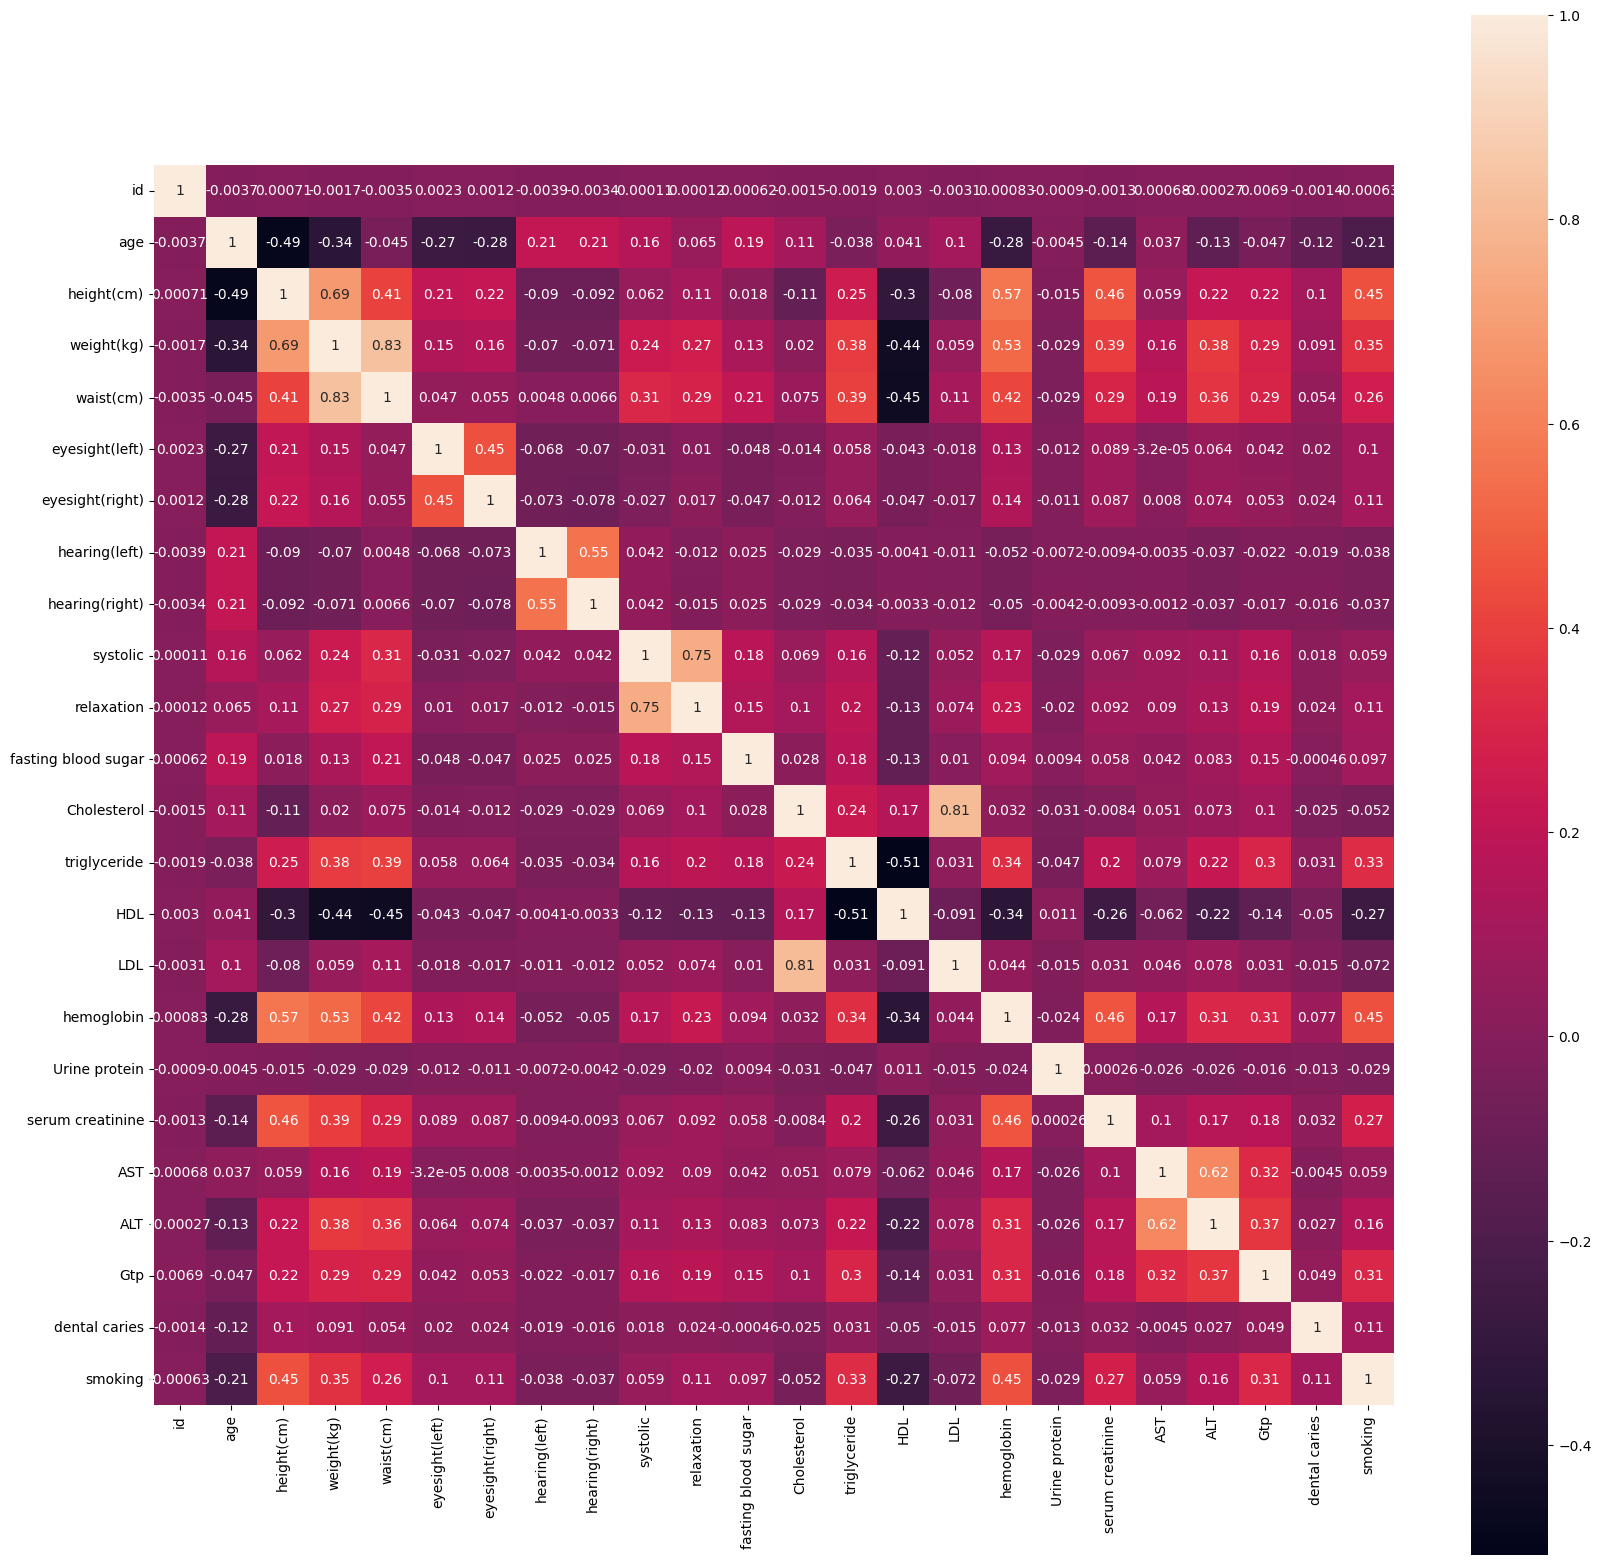

In [ ]:
# 각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화
import seaborn as sns

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True, square=True)

## 전처리

In [7]:
df['id'].value_counts()
# id는 중복값 없으므로 삭제
df.drop('id',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  198240 non-null  int64  
 1   height(cm)           198240 non-null  int64  
 2   weight(kg)           198240 non-null  int64  
 3   waist(cm)            198240 non-null  float64
 4   eyesight(left)       198240 non-null  float64
 5   eyesight(right)      198240 non-null  float64
 6   hearing(left)        198240 non-null  int64  
 7   hearing(right)       198240 non-null  int64  
 8   systolic             198240 non-null  int64  
 9   relaxation           198240 non-null  int64  
 10  fasting blood sugar  198240 non-null  int64  
 11  Cholesterol          198240 non-null  int64  
 12  triglyceride         198240 non-null  int64  
 13  HDL                  198240 non-null  int64  
 14  LDL                  198240 non-null  int64  
 15  hemoglobin       

In [8]:
## 이상치 처리

import numpy as np
# 'Gtp(감마-글루타밀 전이효소 = 간 효소)' 모든 값을 0과 300 사이로 제한
# [ Gtp값이 높으면 갑상성 기능 항진증, 신부전증, 췌장암, 당뇨병 등 질병 의심 가능 ]
# [ 정상 범위 : 남자 = 11 ~ 63 / 여자 = 8 ~ 35]
df['Gtp'] = np.clip(df['Gtp'], 0, 300)

# 'HDL' (고밀도 지단백질) 값을 0과 110 사이로 제한
# [ 콜레스테롤을 없애주는 역할로, 높으면 뇌졸중과 심장 마비의 위험 낮춤 ]
# [ 정상 범위 : 남자 = 40 이상 / 여자 = 50 이상 ]
df['HDL'] = np.clip(df['HDL'], 0, 110)

# 'LDL' (저밀도 지단백질) 값을 0과 200 사이로 제한
# [ 콜레스테롤을 체세포에 전달하는 역할로, 높으면 뇌졸중과 심장 마비의 위험 높임 ]
# [ 정상 범위 : 90 ~ 130 ]
df['LDL'] = np.clip(df['LDL'], 0, 200)

# 'ALT' (알라닌 아미노전이효소) 값을 0과 150 사이로 제한
# [ 간세포 내 효소, ALT값이 높으면 급성간염, 만성간염 등의 간질환 발생, 정상범위 = 0 ~ 40 ]
df['ALT'] = np.clip(df['ALT'], 0, 150)

# 'AST' (아스파르트산 아미노전이효소) 값을 0과 100 사이로 제한
# [ 간세포 내 효소, AST값이 높으면 간세포가 많이 손상되었음을 의미, 정상범위 = 0 ~ 40 ]
df['AST'] = np.clip(df['AST'], 0, 100)

# 'serum creatinine' 값을 0과 3 사이로 제한
# [ 혈청 크레아티닌은 콩팥에 의해 변하지 않고 배설되는 근육 대사의 부산물(노폐물)로,
# 수치가 높으면, 신장 기능이 저하되었을 가능성이 높음 ]
# - 남성 혈청크레아티닌 정상수치 = 0.61 ~ 1.04
# - 여성 혈청크레아티닌 정상수치 = 0.47 ~ 0.79
df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 3)

In [9]:
## 추가 컬럼
# BMI = weight/ (height / 100) ** 2
df['BMI']=df['weight(kg)']/((df['height(cm)']/100) **2)
# 맥압 = 수축기 혈압 - 이완기 혈압
df['diff_systolic_relaxation']=df['systolic']-df['relaxation']
# 평균 시력
df['avg_eyesight']=(df['eyesight(left)']+df['eyesight(right)'])/2
# 평균 청력
df['avg_hearing']=(df['hearing(left)']+df['hearing(right)'])/2

# AST,ALT 평균
df['avg_AST_ALT']=(df['AST']+df['ALT'])/2
# 키 대 허리둘레 비율 = 키(cm) / 허리(cm)
df['키 대 허리둘레 비율'] = df['height(cm)'] / df['waist(cm)']
# 키 대 나이 비율 = 키(cm) / 나이
df['키 대 나이 비율'] = df['height(cm)'] / df['age']

# 연령대별 헤모글로빈 수준 = 헤모글로빈 * (정규화된 나이 = 나이 / 최대 나이)
max_age = df['age'].max()
df['연령대별 헤모글로빈 수준'] = df['hemoglobin'] * (df['age'] / max_age)

# 수축기 혈압 연령 비율 = 개인별 수축기 혈압 지수 / 연령대별 평균 수축기 혈압
quantile_bins = pd.qcut(df['age'], q=5, labels=False, precision=0)
grouped_systolic = df.groupby(quantile_bins)['systolic'].transform('mean')
df['수축기 혈압 연령 비율'] = df['systolic'] / grouped_systolic

# 나이와 콜레스테롤 상관관계 = (콜레스테롤 * 나이) / 100
df['나이와 콜레스테롤 상관관계'] = df['Cholesterol'] * df['age'] / 100

# 수축기 혈압과 BMI의 비율 = 수축기 혈압 / BMI
df['수축기 혈압과 BMI의 비율'] = df['systolic'] / df['BMI']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       198240 non-null  int64  
 1   height(cm)                198240 non-null  int64  
 2   weight(kg)                198240 non-null  int64  
 3   waist(cm)                 198240 non-null  float64
 4   eyesight(left)            198240 non-null  float64
 5   eyesight(right)           198240 non-null  float64
 6   hearing(left)             198240 non-null  int64  
 7   hearing(right)            198240 non-null  int64  
 8   systolic                  198240 non-null  int64  
 9   relaxation                198240 non-null  int64  
 10  fasting blood sugar       198240 non-null  int64  
 11  Cholesterol               198240 non-null  int64  
 12  triglyceride              198240 non-null  int64  
 13  HDL                       198240 non-null  i

In [10]:
# BMI에 따라 분류
# 18.5 미만: 저체충
# 18.5~24.9: 건강
# 25~29.9: 과체중
# 30~34.9: case1 비만
# 35~39.9: case2 비만
# 40 이상: case3 비만
df['BMI_status']=0
for i in range(len(df)):
  if df['BMI'][i] < 18.5:
    df['BMI_status'][i]='underweight'
  elif (df['BMI'][i] >= 18.5) & (df['BMI'][i] < 25):
    df['BMI_status'][i]='normal weight'
  elif (df['BMI'][i] >= 25) & (df['BMI'][i] < 30):
    df['BMI_status'][i]='pre obesity'
  elif (df['BMI'][i] >= 30) & (df['BMI'][i] < 35):
    df['BMI_status'][i]='obesity case1'
  elif (df['BMI'][i] >= 35) & (df['BMI'][i] < 40):
    df['BMI_status'][i]='obesity case2'
  else:
    df['BMI_status'][i]='obesity case3'

<ipython-input-10-e701c880714e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_status'][i]='normal weight'


In [9]:
df.index

RangeIndex(start=0, stop=198240, step=1)

In [53]:
# col_names=train.columns
# train_underweight=train[train['BMI_status']=='underweight']
# train_normalweight=train[train['BMI_status']=='normal weight']
# train_preobesity=train[train['BMI_status']=='pre obesity']
# train_obesitycase1=train[train['BMI_status']=='obesity case1']
# train_obesitycase2=train[train['BMI_status']=='obesity case2']
# train_obesitycase3=train[train['BMI_status']=='obesity case3']

# for i in col_names:
#   # ax1 = fig.add_subplot(6,1,1)
#   train_underweight[i].hist()
#   plt.title(i)
#   plt.show()

#   # ax2 = fig.add_subplot(6,1,2)
#   train_normalweight[i].hist()
#   plt.title(i)
#   plt.show()

#   # ax3 = fig.add_subplot(6,1,3)
#   train_preobesity[i].hist()
#   plt.title(i)
#   plt.show()

#   # ax4 = fig.add_subplot(6,1,4)
#   train_obesitycase1[i].hist()
#   plt.title(i)
#   plt.show()

#   # ax5 = fig.add_subplot(6,1,5)
#   train_obesitycase2[i].hist()
#   plt.title(i)
#   plt.show()

#   # ax6 = fig.add_subplot(6,1,6)
#   train_obesitycase3[i].hist()
#   plt.title(i)
#   plt.show()

## BMI별로 비교한 결과
- age: obesity case3만 다른 그룹과 분포가 다름. 30대 초반이 많고 30중후반이 없음. 50대 이상도 많음
- height: 대체로 정규분포를 따름. obesity case3에서 균등한 분포를 보임
- relaxation: obesity case3만 전반적으로 값이 큼.
- hemoglobin: 체중이 많이 나가는 그룹일수록 값이 커지는 경향
- smoking: pre obesity, obesity case1, obesity case2는 피는 사람이 더 많음

In [ ]:
train['age'].value_counts()

40    46691
60    19043
45    18480
50    15768
55    13446
35    13081
30    11465
25     9140
20     3829
65     3637
70     2229
75     1760
80      644
85       38
58        2
62        1
69        1
49        1
Name: age, dtype: int64

In [ ]:
## 나이별로 나눠서 보기
train['age grp']=0
for i in range(len(train)):
  if train['age'][i] < 40:
    train['age grp'][i]='20~39'
  elif (train['age'][i] >= 40) & (train['age'][i] < 60):
    train['age grp'][i]='40~59'
  else:
    train['age grp'][i]='older than 60'



<ipython-input-65-d9f01bc2caa2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age grp'][i]='40~59'


In [ ]:
train['age grp'].value_counts()

40~59            94388
20~39            37515
older than 60    27353
Name: age grp, dtype: int64

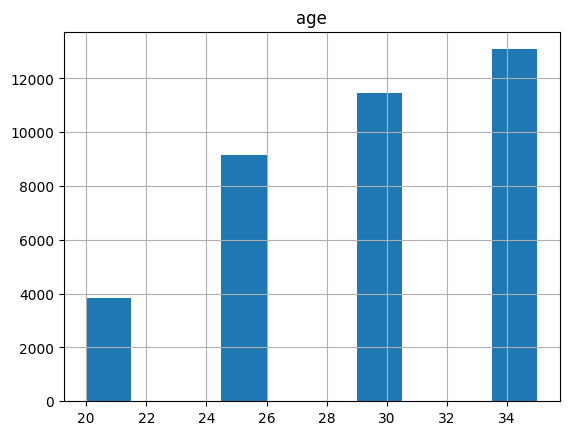

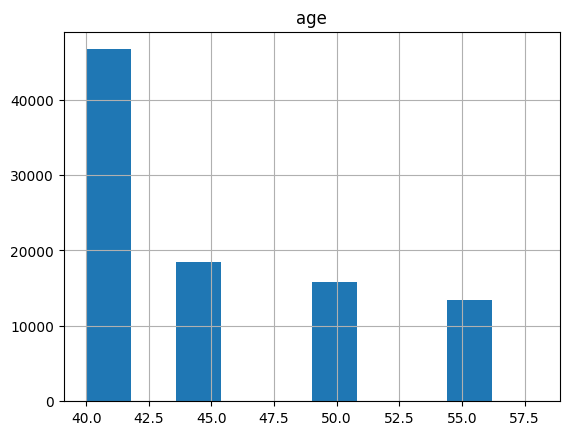

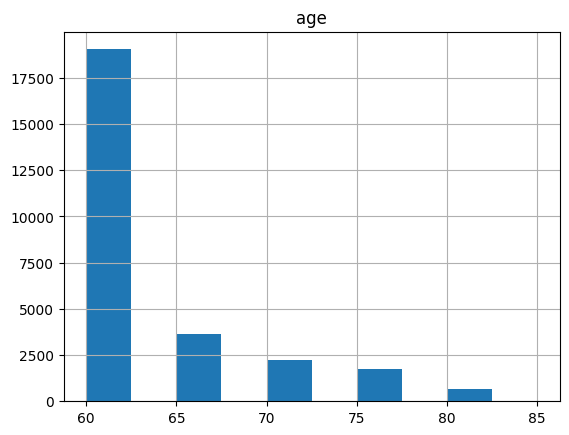

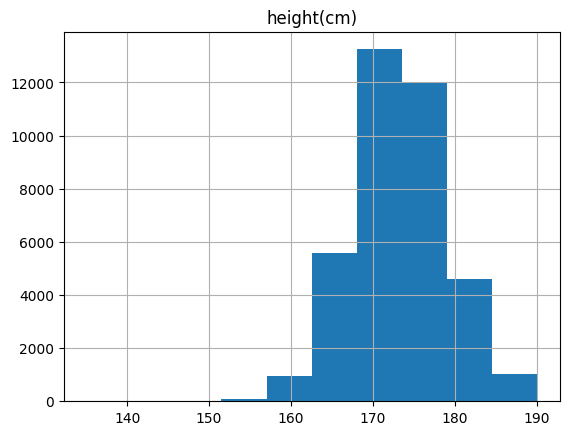

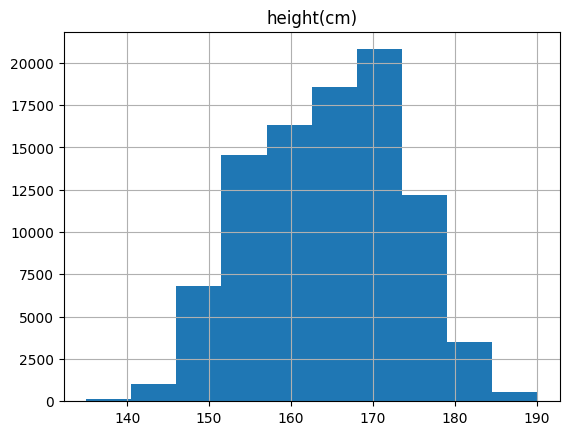

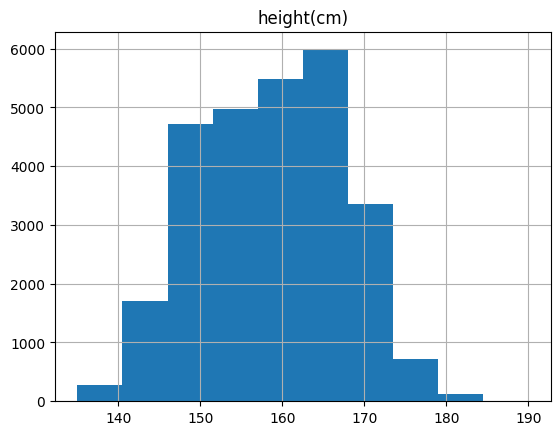

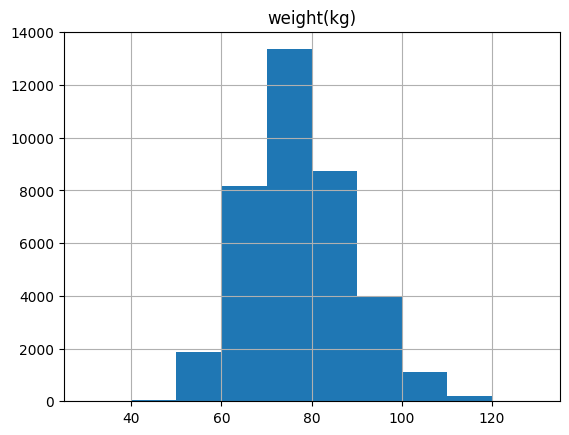

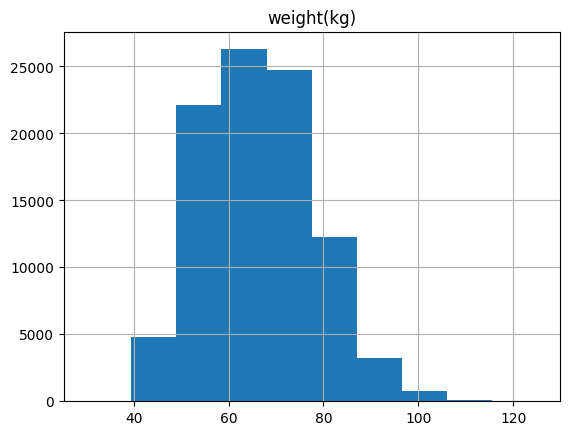

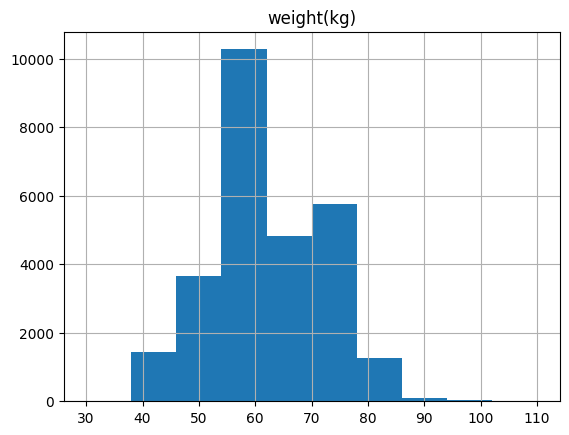

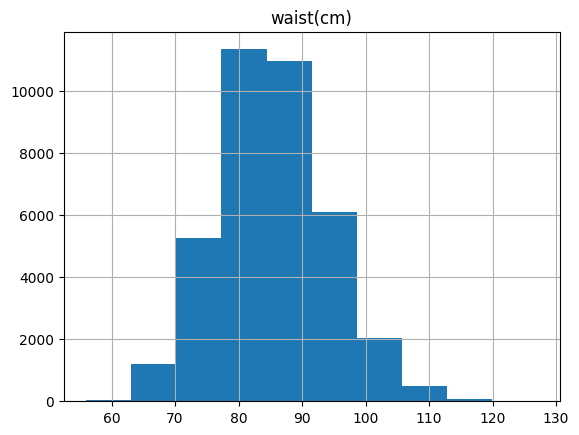

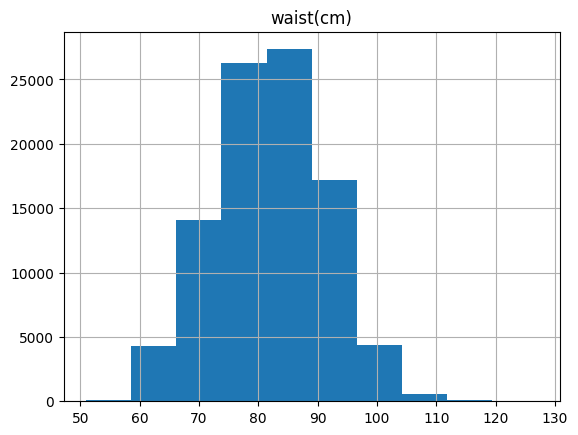

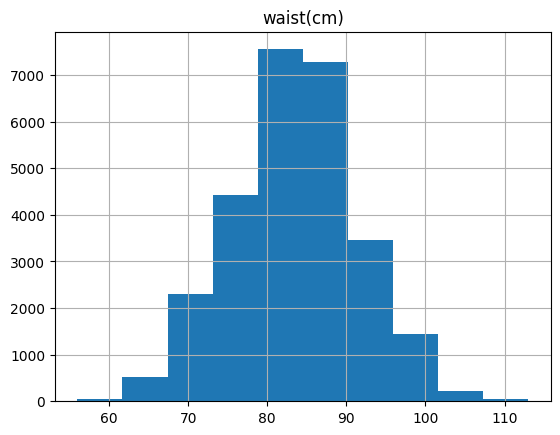

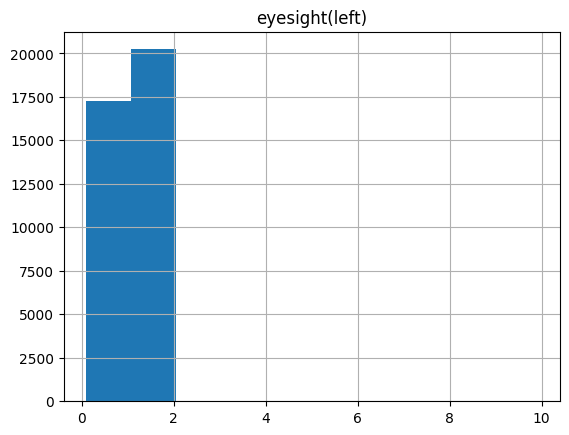

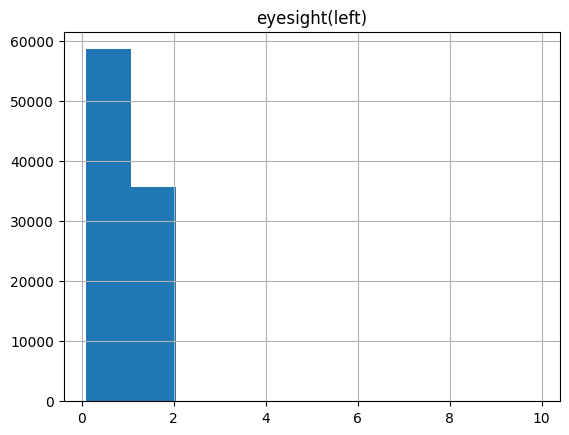

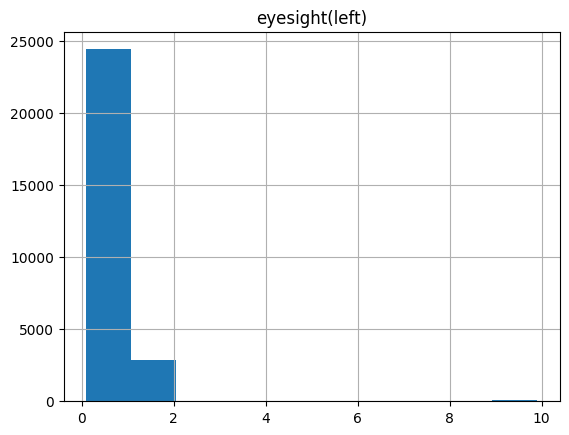

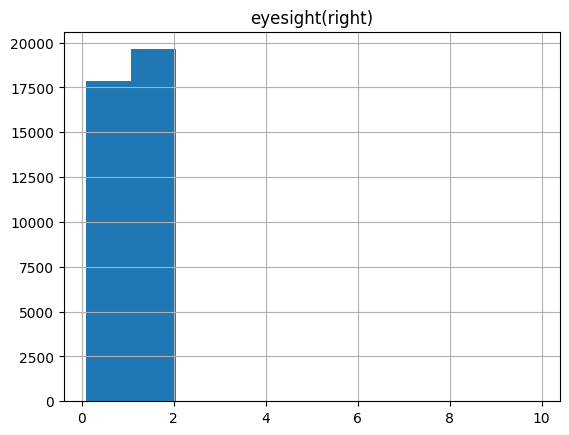

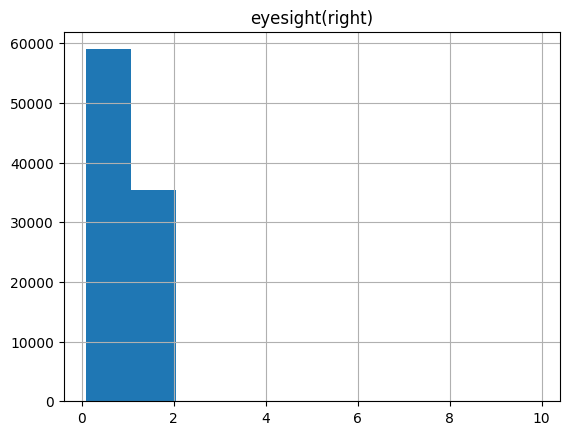

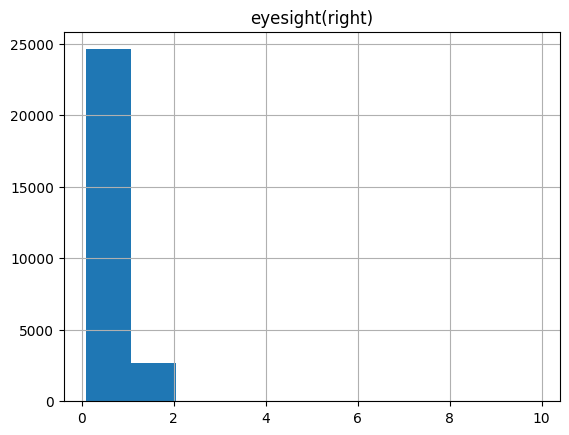

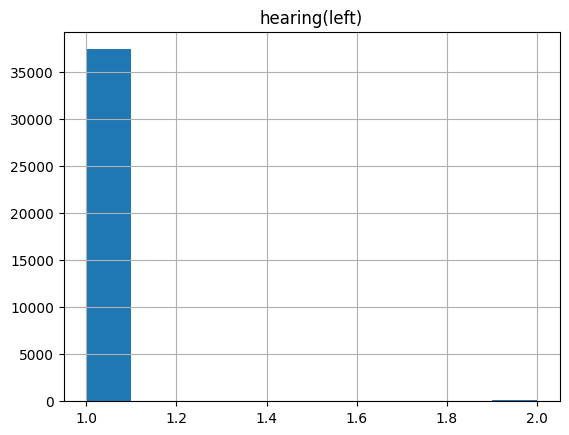

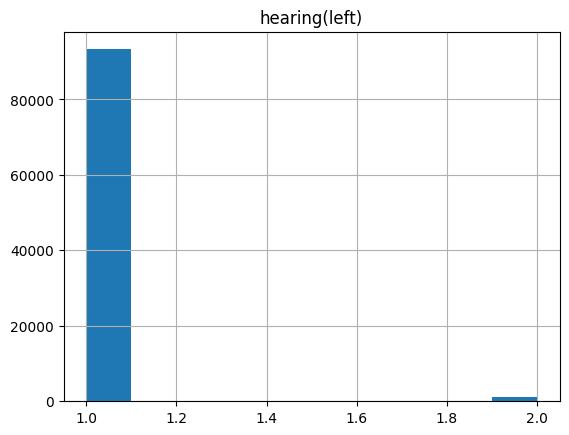

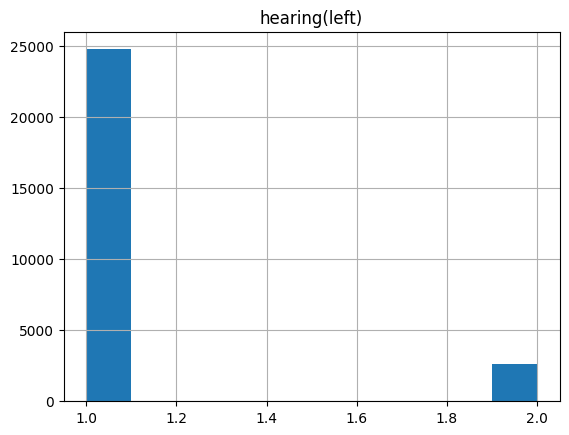

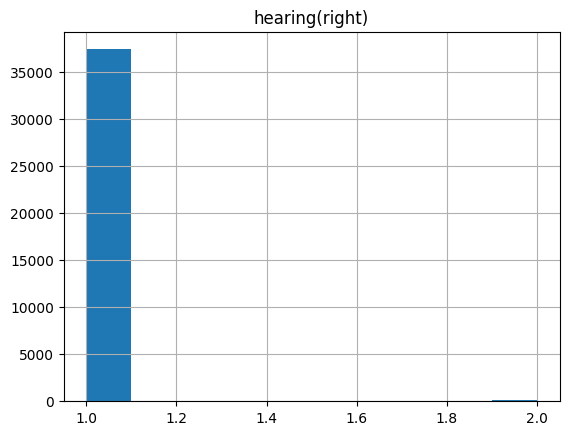

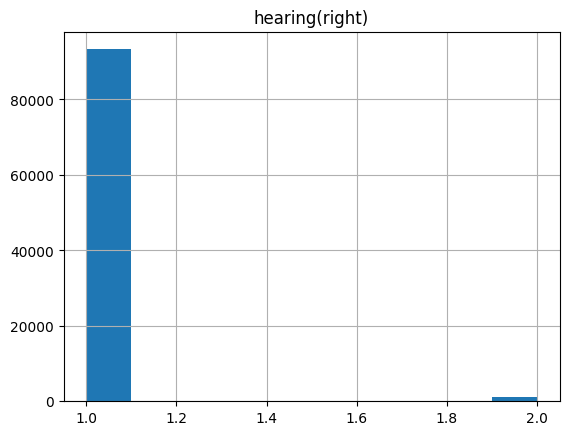

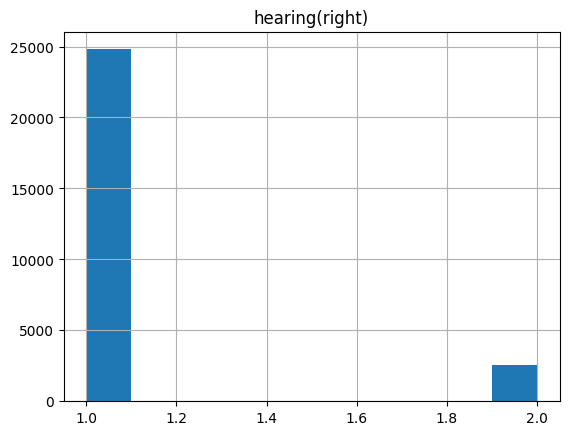

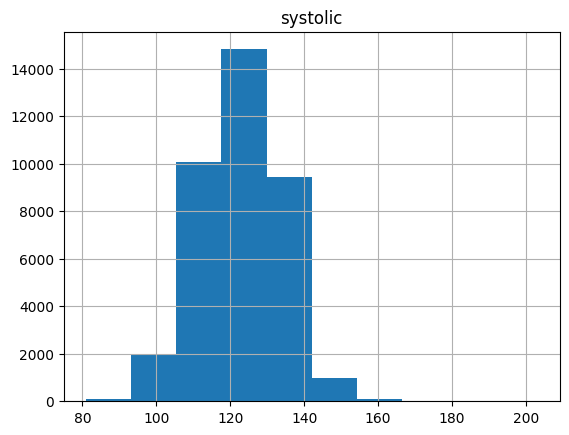

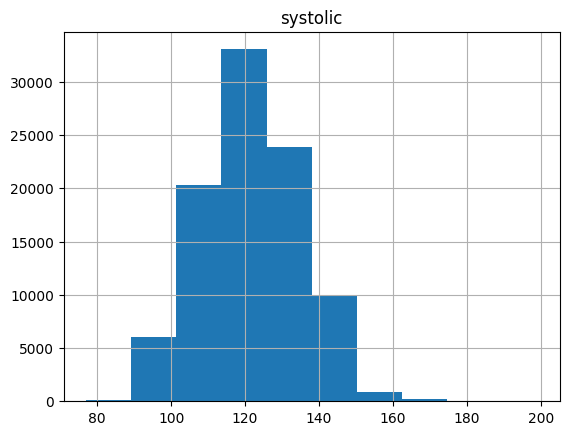

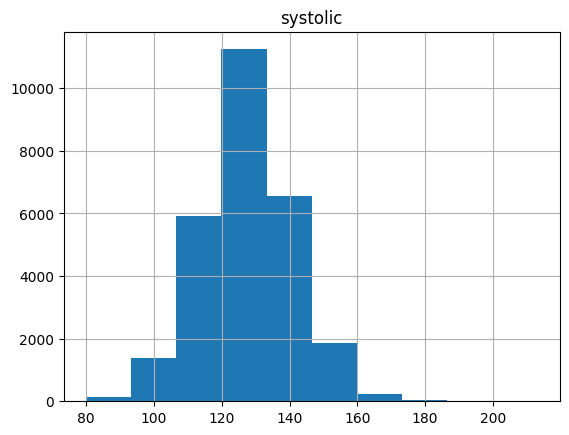

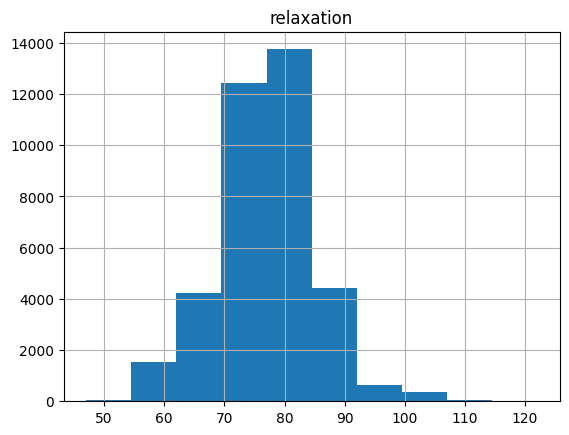

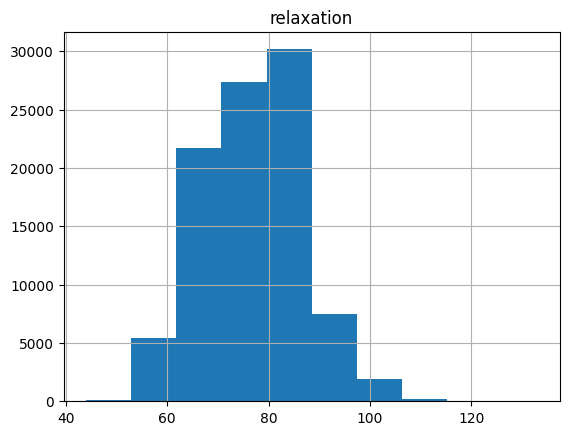

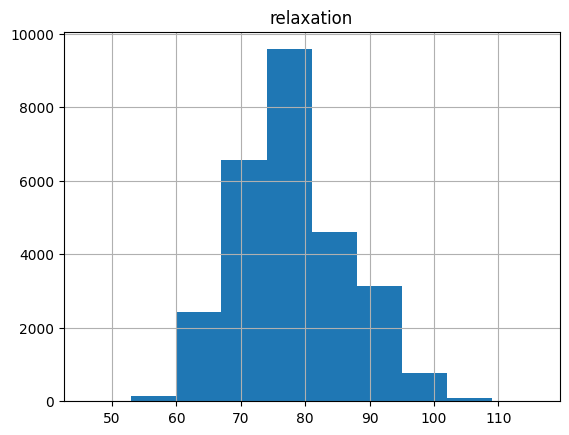

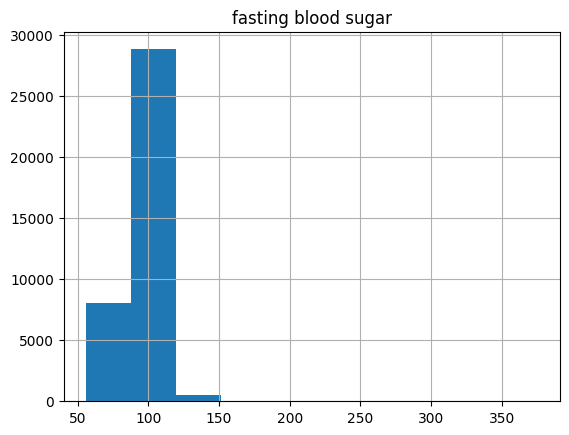

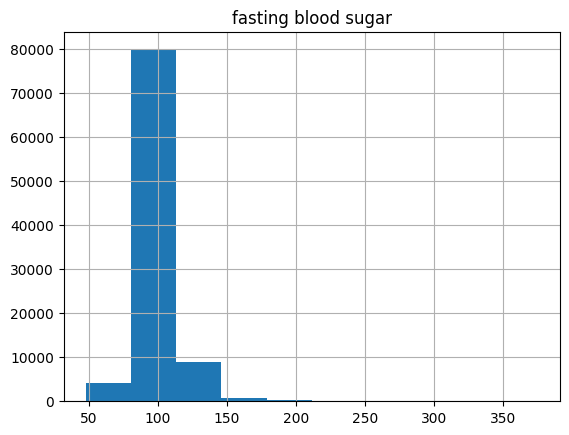

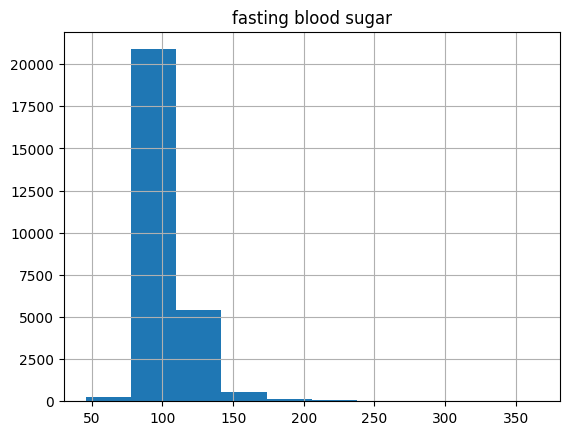

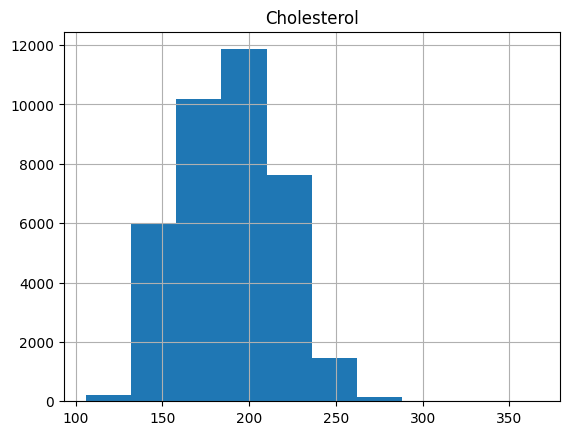

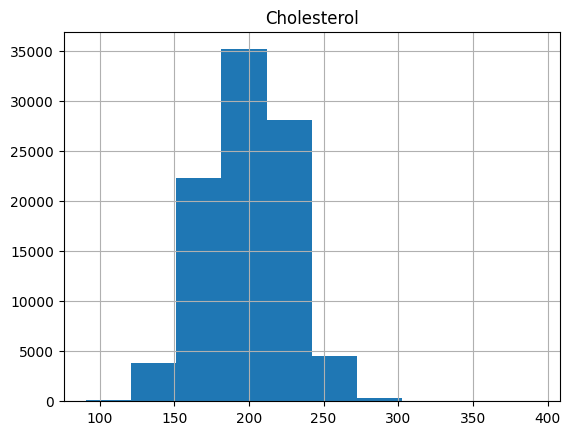

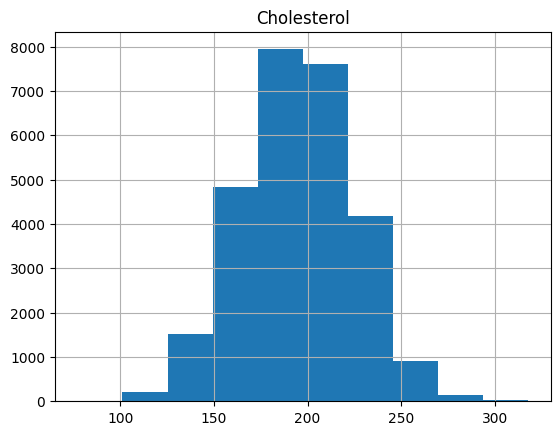

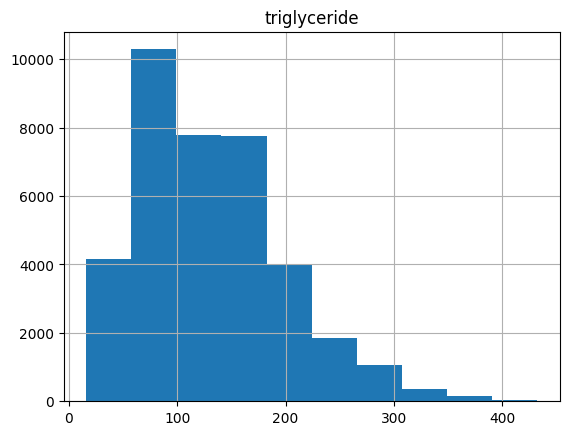

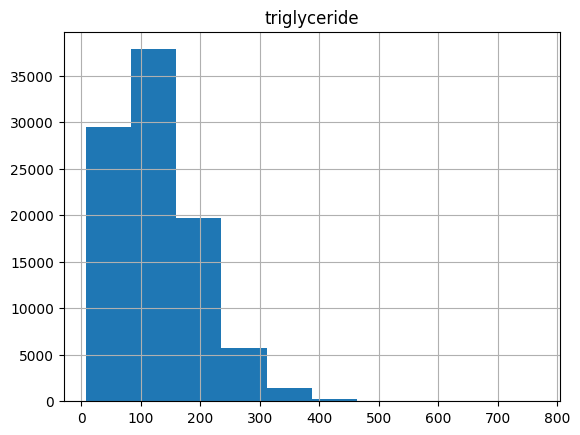

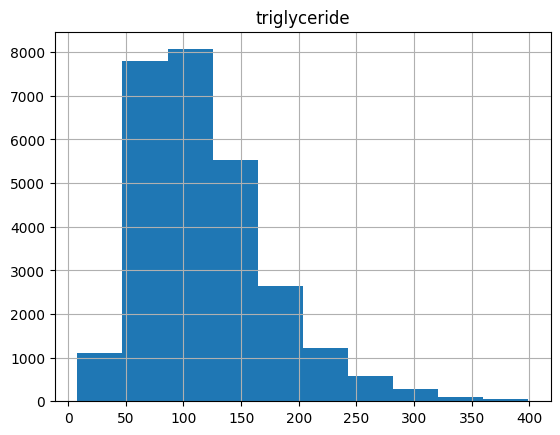

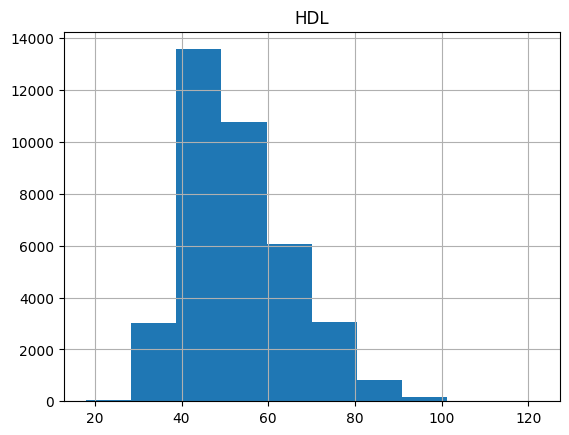

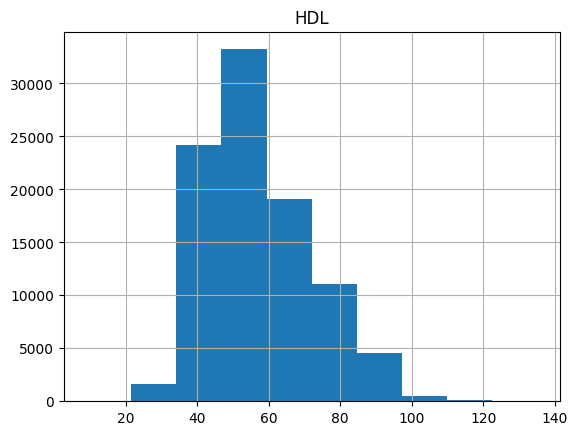

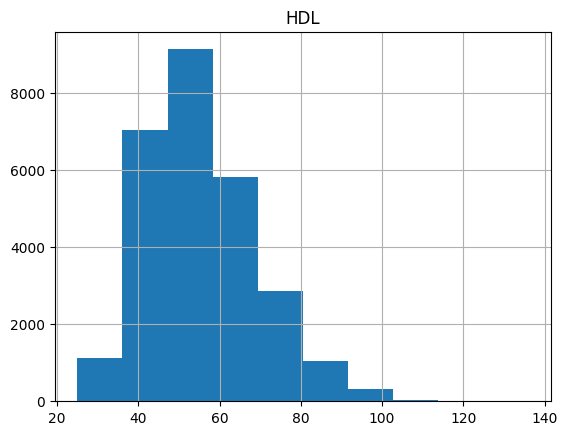

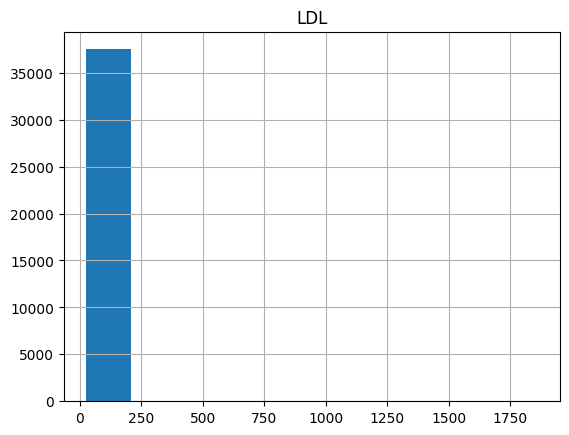

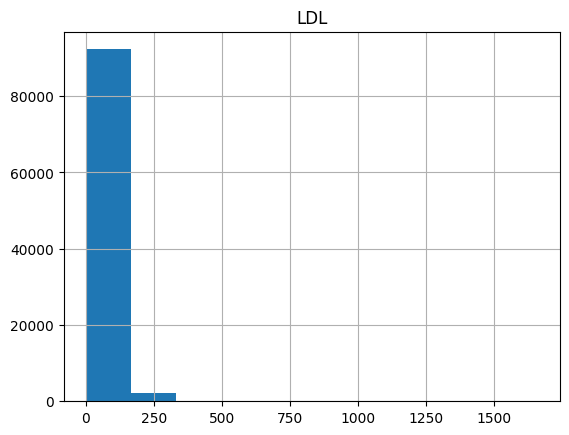

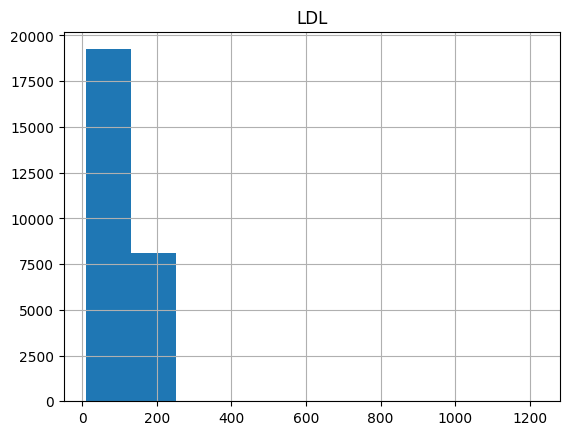

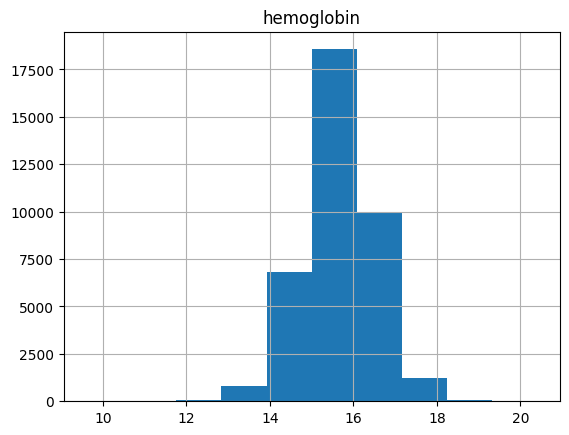

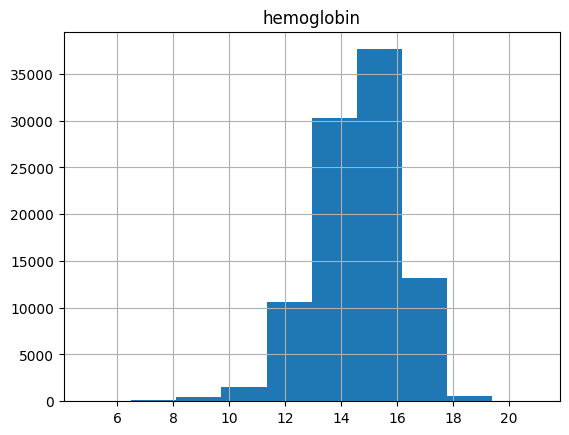

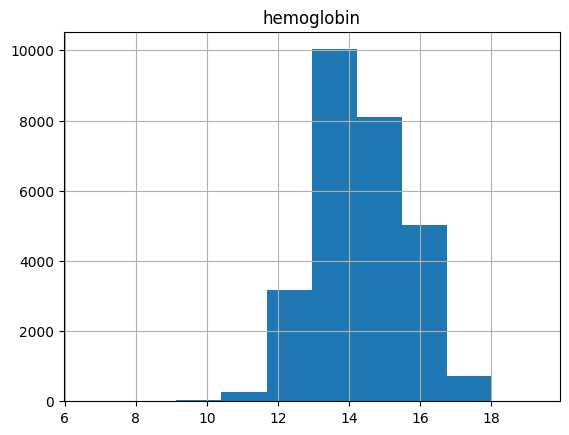

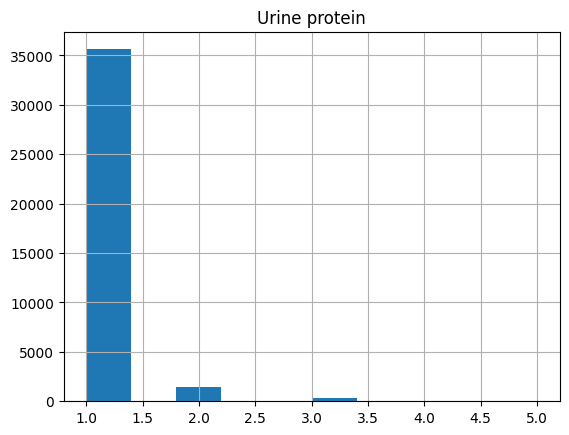

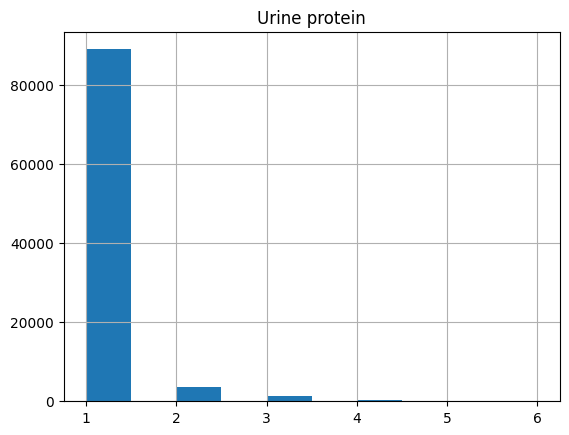

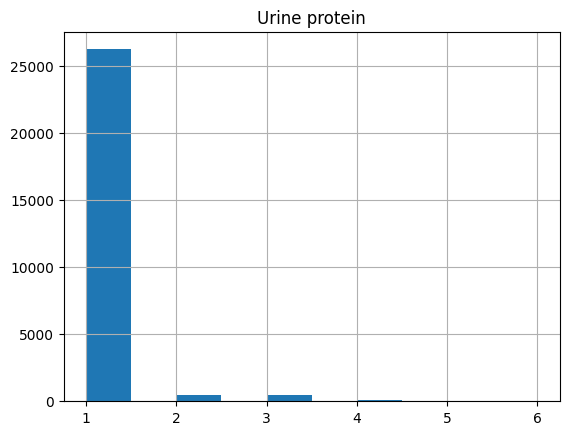

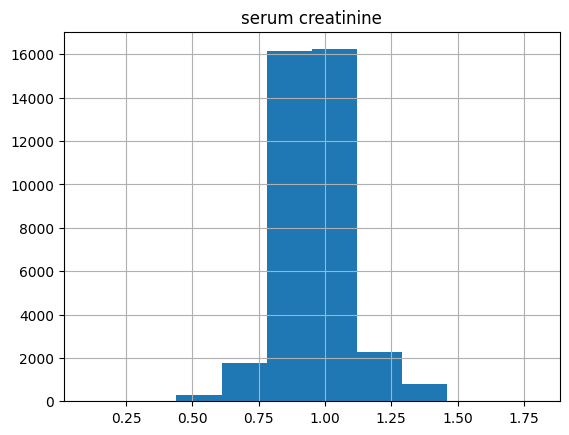

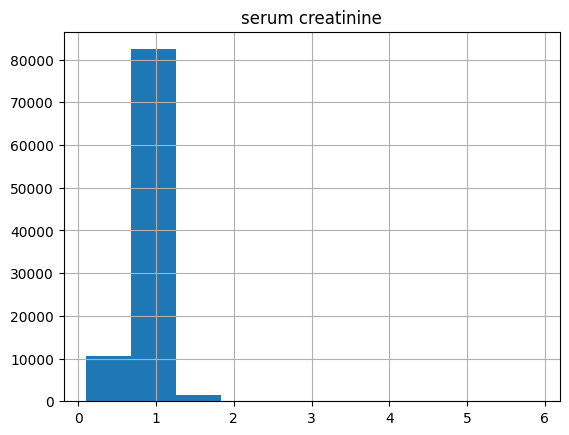

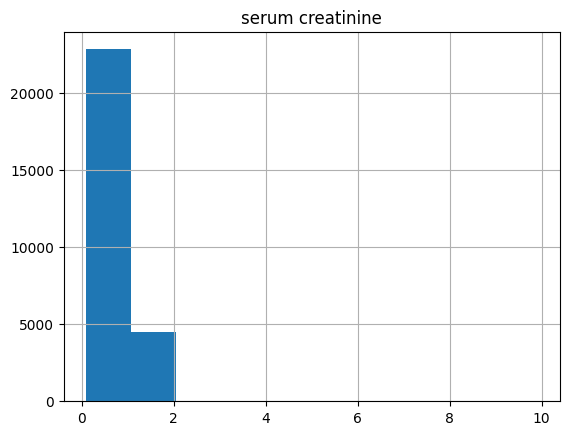

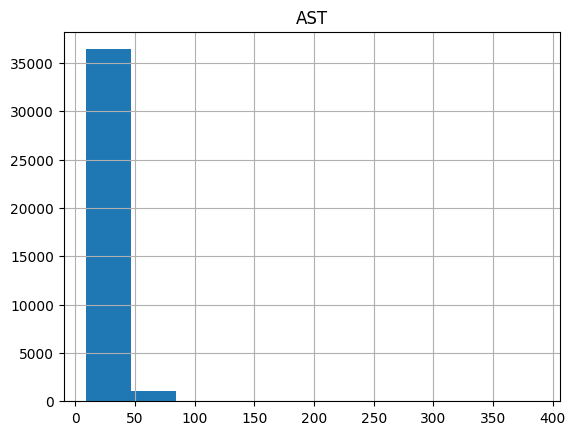

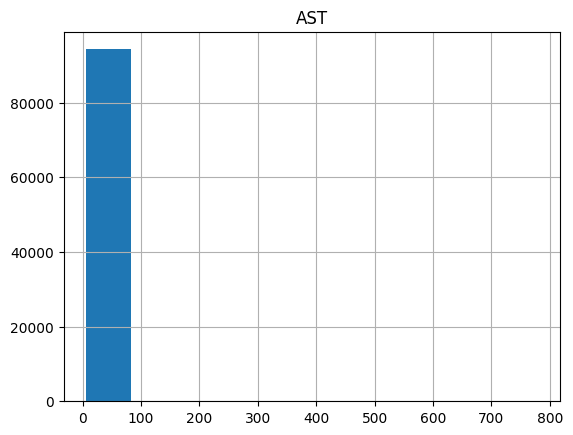

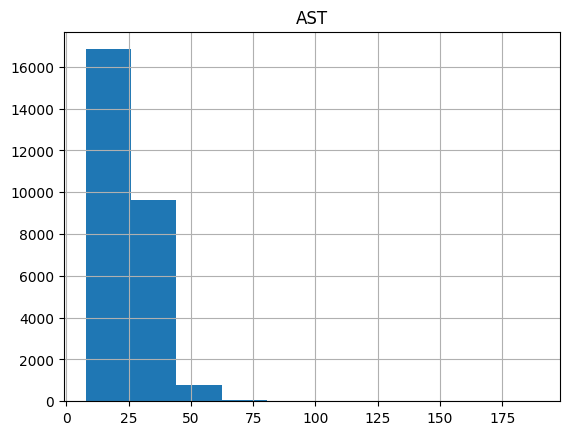

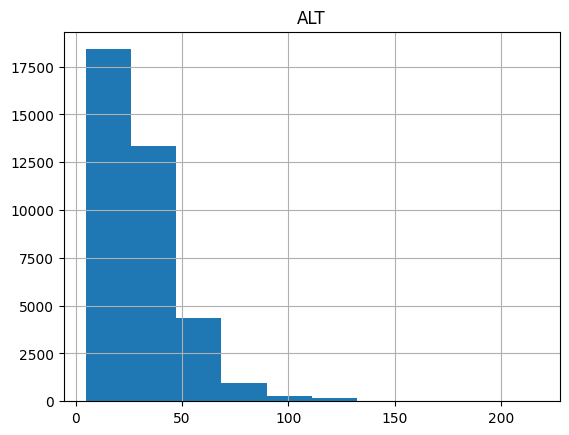

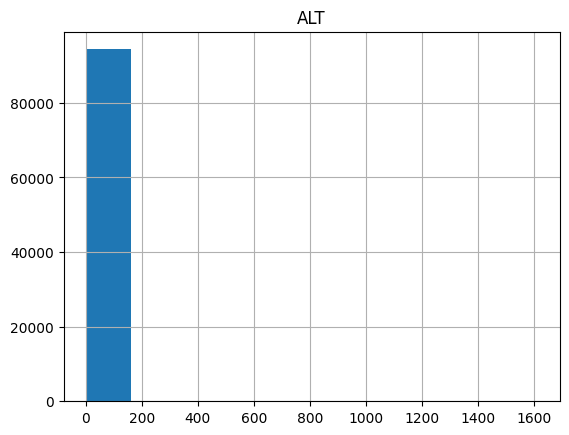

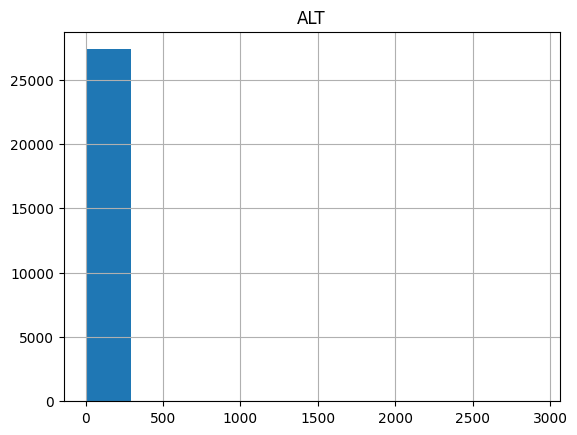

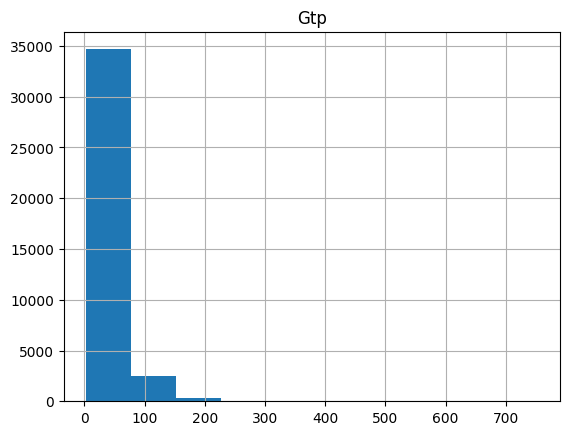

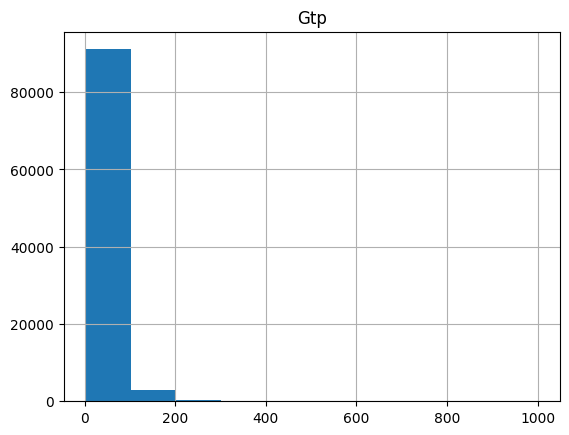

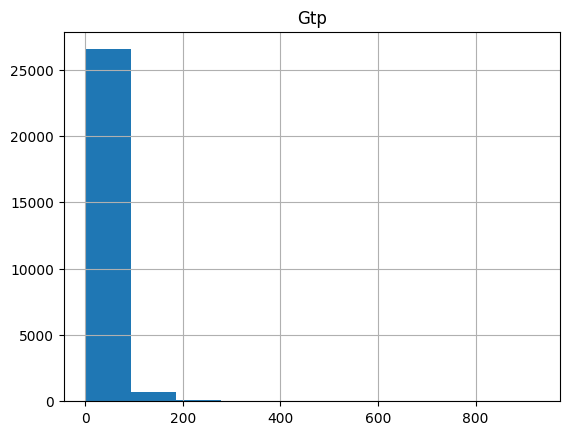

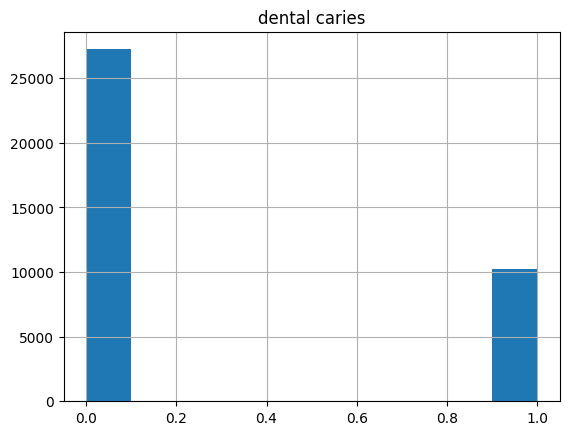

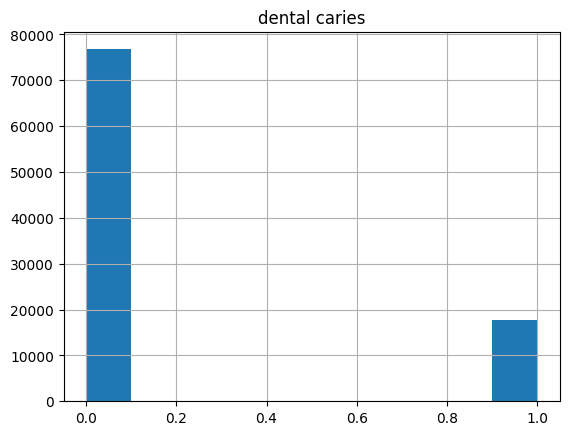

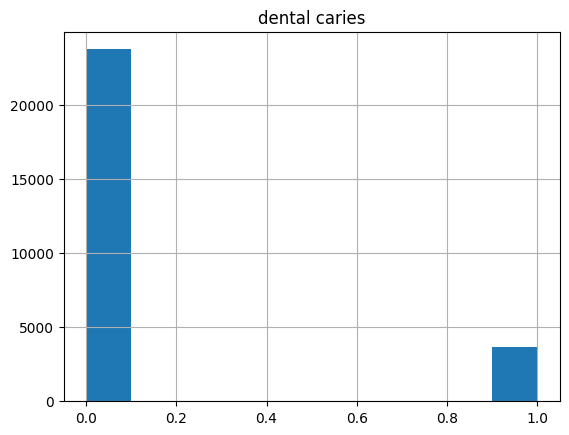

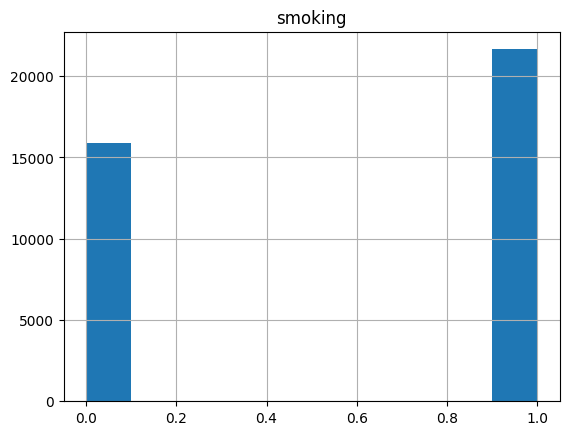

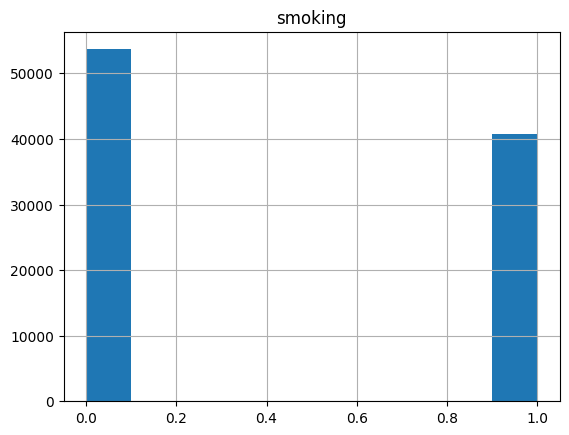

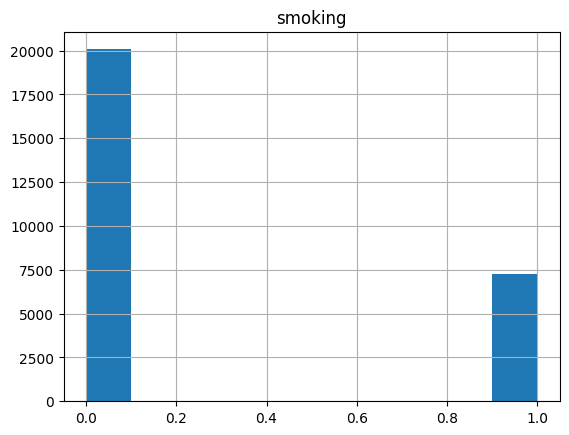

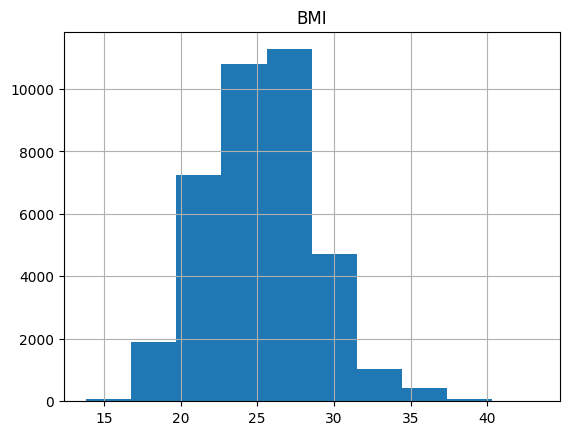

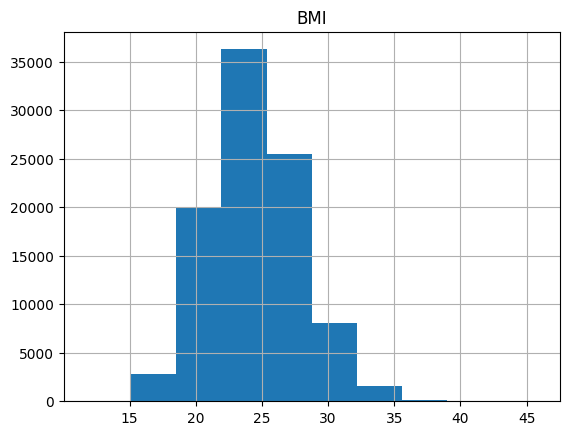

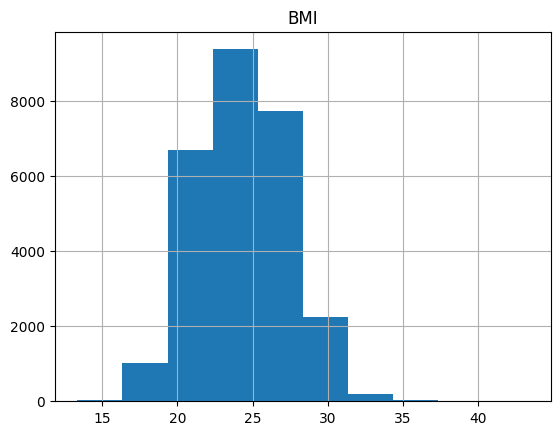

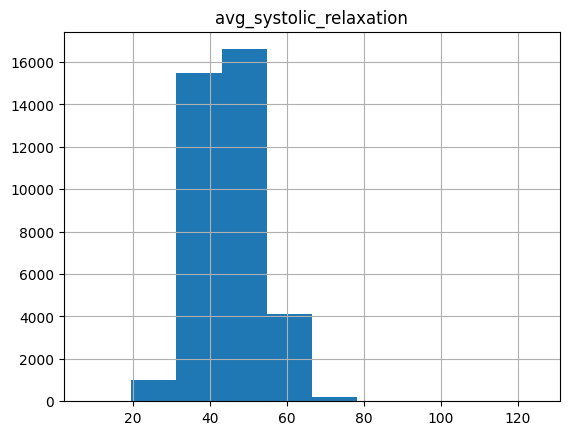

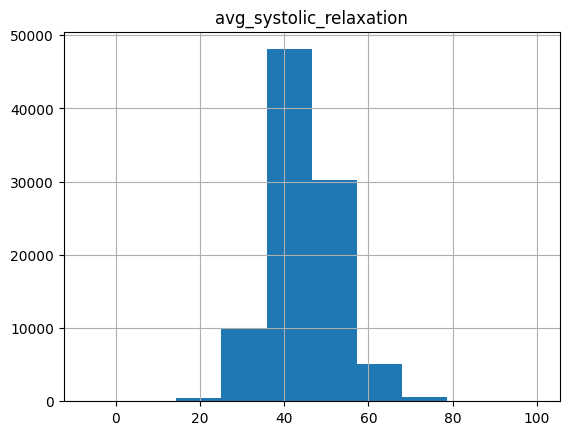

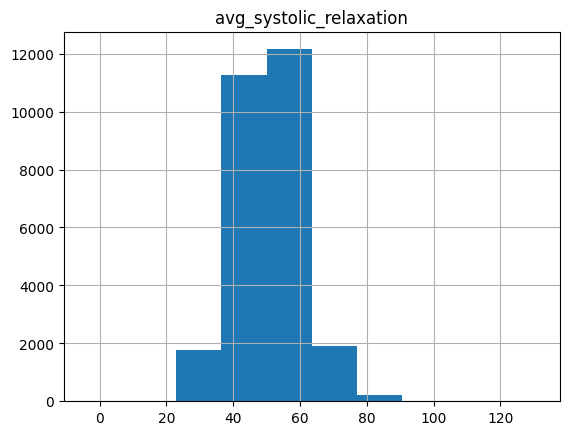

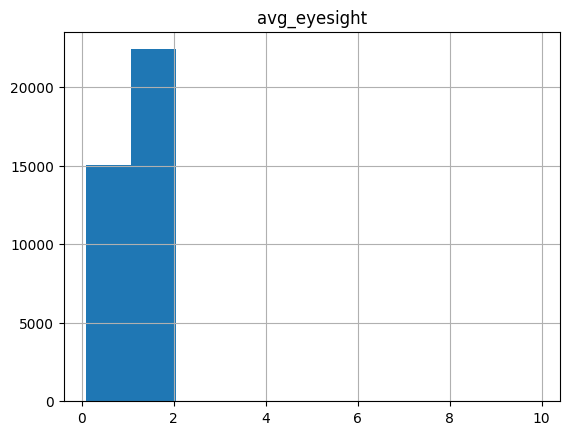

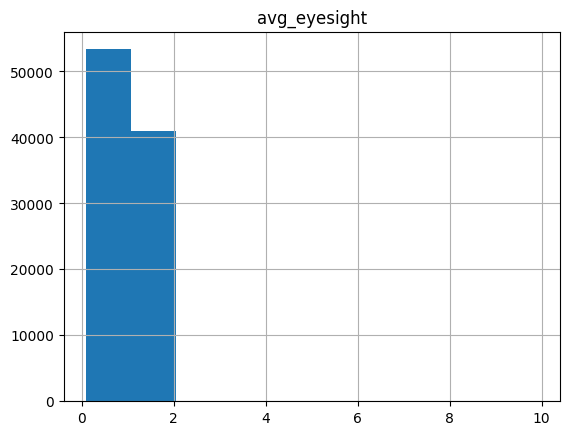

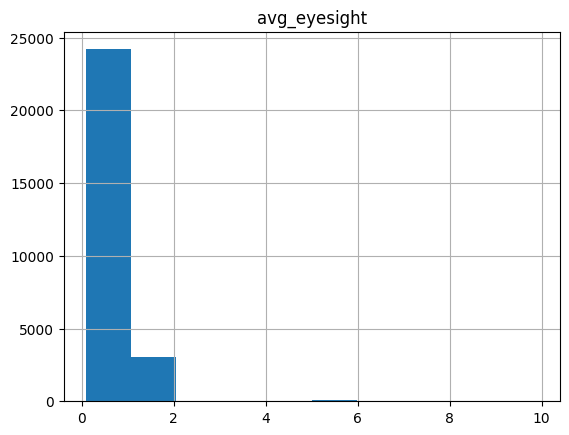

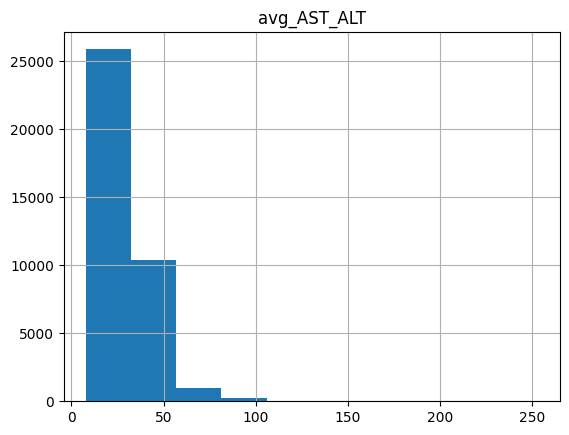

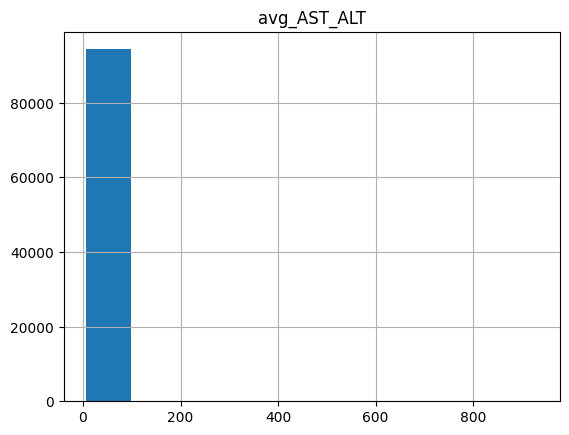

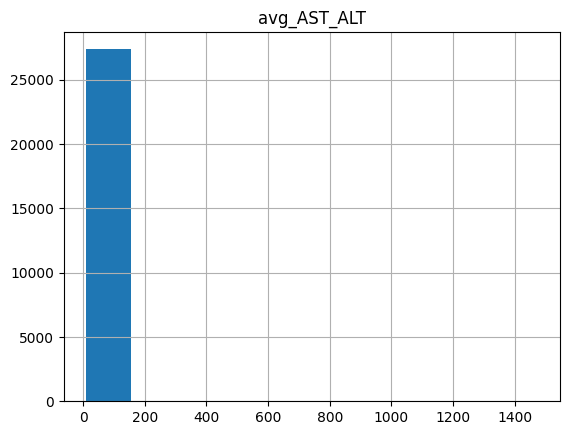

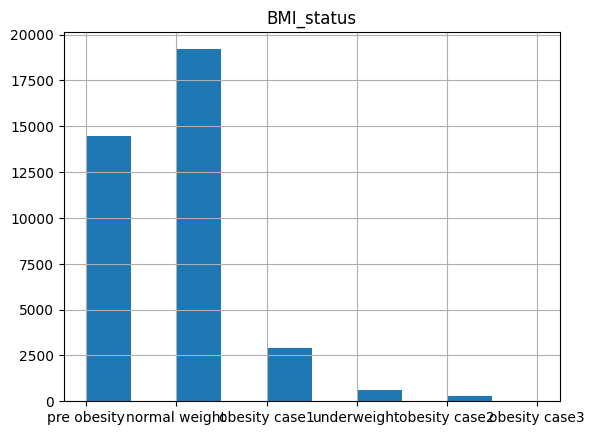

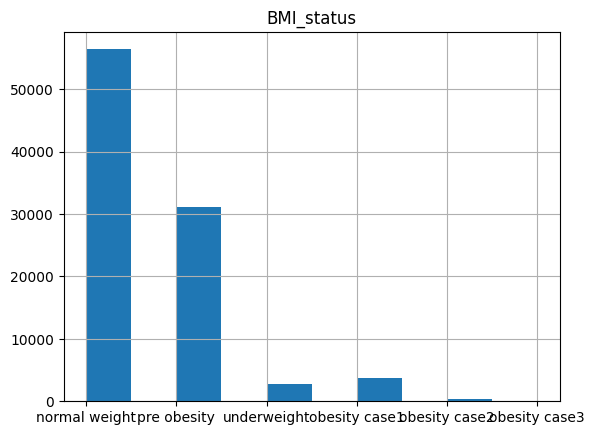

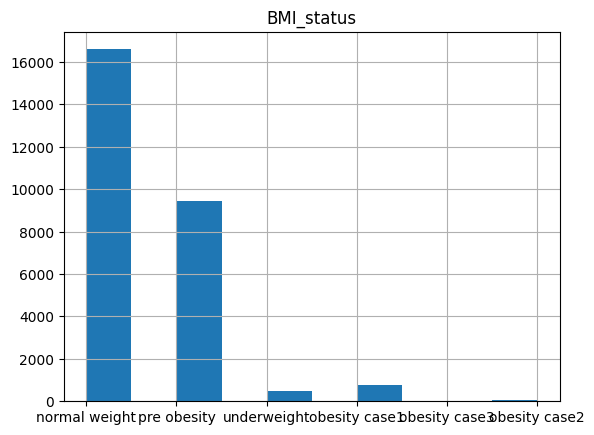

In [ ]:
train_age2030=train[train['age grp']=='20~39']
train_age4050=train[train['age grp']=='40~59']
train_age607080=train[train['age grp']=='older than 60']

for i in col_names:
  # ax1 = fig.add_subplot(6,1,1)
  train_age2030[i].hist()
  plt.title(i)
  plt.show()

  # ax2 = fig.add_subplot(6,1,2)
  train_age4050[i].hist()
  plt.title(i)
  plt.show()

  # ax3 = fig.add_subplot(6,1,3)
  train_age607080[i].hist()
  plt.title(i)
  plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      159256 non-null  int64  
 1   height(cm)               159256 non-null  int64  
 2   weight(kg)               159256 non-null  int64  
 3   waist(cm)                159256 non-null  float64
 4   eyesight(left)           159256 non-null  float64
 5   eyesight(right)          159256 non-null  float64
 6   hearing(left)            159256 non-null  int64  
 7   hearing(right)           159256 non-null  int64  
 8   systolic                 159256 non-null  int64  
 9   relaxation               159256 non-null  int64  
 10  fasting blood sugar      159256 non-null  int64  
 11  Cholesterol              159256 non-null  int64  
 12  triglyceride             159256 non-null  int64  
 13  HDL                      159256 non-null  int64  
 14  LDL 

In [ ]:
train_age2030[['fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','Urine protein','serum creatinine','avg_systolic_relaxation','avg_AST_ALT']].describe()

,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,avg_systolic_relaxation,avg_AST_ALT
count,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000
mean,94.544662,188.728828,130.950660,53.234493,109.547674,15.636058,1.063788,0.958771,45.456377,28.703639
std,10.909123,27.862182,66.126413,12.169642,28.679956,0.852611,0.301246,0.138427,7.603224,13.033410
min,56.000000,106.000000,16.000000,18.000000,25.000000,9.600000,1.000000,0.100000,8.000000,8.000000
25%,88.000000,167.000000,79.000000,44.000000,90.000000,15.100000,1.000000,0.900000,40.000000,19.500000
50%,94.000000,189.000000,119.000000,51.000000,108.000000,15.600000,1.000000,1.000000,45.000000,26.000000
75%,99.000000,209.000000,170.000000,60.000000,128.000000,16.200000,1.000000,1.000000,50.000000,35.000000
max,375.000000,366.000000,432.000000,122.000000,1860.000000,20.400000,5.000000,1.800000,125.000000,252.500000


In [ ]:
train_age4050[['fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','Urine protein','serum creatinine','avg_systolic_relaxation','avg_AST_ALT']].describe()

,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,avg_systolic_relaxation,avg_AST_ALT
count,94388.000000,94388.000000,94388.000000,94388.000000,94388.000000,94388.000000,94388.000000,94388.000000,94388.000000,94388.000000
mean,98.655528,198.900369,128.734691,56.930182,116.387973,14.596038,1.080042,0.872345,44.518954,25.271253
std,15.803149,27.701428,68.770795,14.620456,27.442537,1.524842,0.359525,0.178719,7.957867,11.993151
min,48.000000,91.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,-7.000000,6.500000
25%,90.000000,179.000000,75.000000,46.000000,97.000000,13.500000,1.000000,0.700000,40.000000,18.000000
50%,96.000000,199.000000,116.000000,54.000000,116.000000,14.800000,1.000000,0.900000,44.000000,22.500000
75%,104.000000,220.000000,168.000000,66.000000,135.000000,15.700000,1.000000,1.000000,50.000000,30.000000
max,375.000000,393.000000,766.000000,135.000000,1660.000000,21.000000,6.000000,5.900000,100.000000,931.000000


## age별로 비교한 결과
- 20,30대에서 담배 피는 비율 가장 높고 나이 들수록 점점 비율 낮아짐

In [ ]:
# serum creatinine 혈청 크레아닌 - 0.5mg/dL 이하면 문제됨 -> 혈청 크레아닌이 0.5이하인 비율 구하기
# BMI별
print(len(train_underweight[train_underweight['serum creatinine'] <= 0.5])/len(train_underweight))
print(len(train_normalweight[train_normalweight['serum creatinine'] <= 0.5])/len(train_normalweight))
print(len(train_preobesity[train_preobesity['serum creatinine'] <= 0.5])/len(train_preobesity))
print(len(train_obesitycase1[train_obesitycase1['serum creatinine'] <= 0.5])/len(train_obesitycase1))
print(len(train_obesitycase2[train_obesitycase2['serum creatinine'] <= 0.5])/len(train_obesitycase2))
print(len(train_obesitycase3[train_obesitycase3['serum creatinine'] <= 0.5])/len(train_obesitycase3))

# -> obeisty case2가 가장 낮음

0.039711191335740074
0.02277929037086854
0.010933129926264938
0.01317027281279398
0.007518796992481203
0.047619047619047616


In [ ]:
# serum creatinine 혈청 크레아닌 - 0.5mg/dL 이하면 문제됨 -> 혈청 크레아닌이 0.5이하인 비율 구하기
# age별
print(len(train_age2030[train_age2030['serum creatinine'] <= 0.5])/len(train_age2030))
print(len(train_age4050[train_age4050['serum creatinine'] <= 0.5])/len(train_age4050))
print(len(train_age607080[train_age607080['serum creatinine'] <= 0.5])/len(train_age607080))

# -> 20,30대가 눈에 띄게 가장 낮음

0.00037318405970944955
0.023445777005551553
0.026797791832705736


In [ ]:
# 시력 좌, 우 -> 베스트, 워스트로 바꾸기

In [ ]:
train['hearing(left)']

0         1
1         2
2         1
3         1
4         1
         ..
159251    1
159252    1
159253    1
159254    1
159255    1
Name: hearing(left), Length: 159256, dtype: int64

In [ ]:
train['hearing(left)'].value_counts()

1    155438
2      3818
Name: hearing(left), dtype: int64

## 머신러닝

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### data processing

In [13]:
df.isnull().sum()

age                         0
height(cm)                  0
weight(kg)                  0
waist(cm)                   0
eyesight(left)              0
eyesight(right)             0
hearing(left)               0
hearing(right)              0
systolic                    0
relaxation                  0
fasting blood sugar         0
Cholesterol                 0
triglyceride                0
HDL                         0
LDL                         0
hemoglobin                  0
Urine protein               0
serum creatinine            0
AST                         0
ALT                         0
Gtp                         0
dental caries               0
smoking                     0
BMI                         0
diff_systolic_relaxation    0
avg_eyesight                0
avg_hearing                 0
avg_AST_ALT                 0
키 대 허리둘레 비율                 0
키 대 나이 비율                   0
연령대별 헤모글로빈 수준               0
수축기 혈압 연령 비율                0
나이와 콜레스테롤 상관관계              0
수축기 혈압과 BM

In [14]:
col_list = df.columns
col_list

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'BMI',
       'diff_systolic_relaxation', 'avg_eyesight', 'avg_hearing',
       'avg_AST_ALT', '키 대 허리둘레 비율', '키 대 나이 비율', '연령대별 헤모글로빈 수준',
       '수축기 혈압 연령 비율', '나이와 콜레스테롤 상관관계', '수축기 혈압과 BMI의 비율', 'BMI_status'],
      dtype='object')

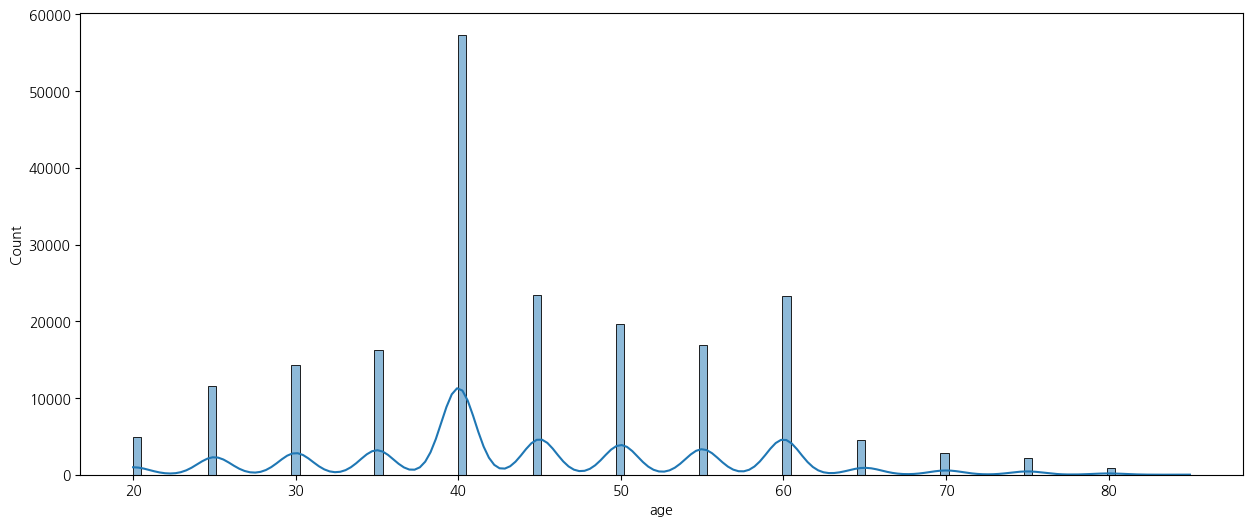

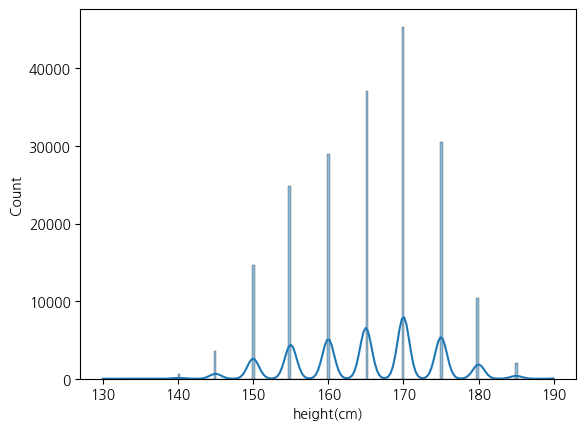

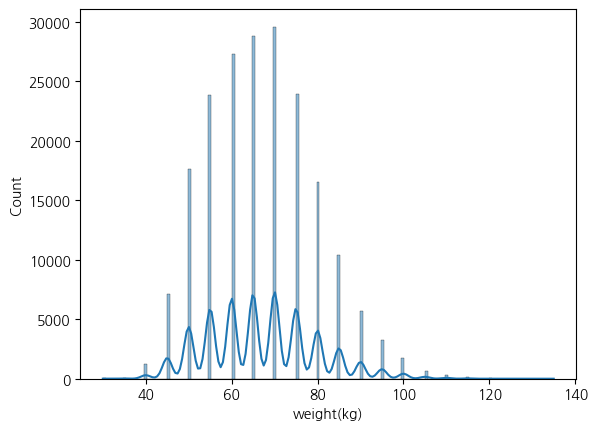

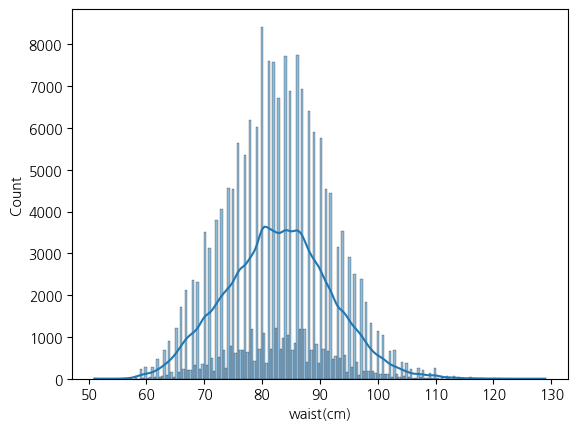

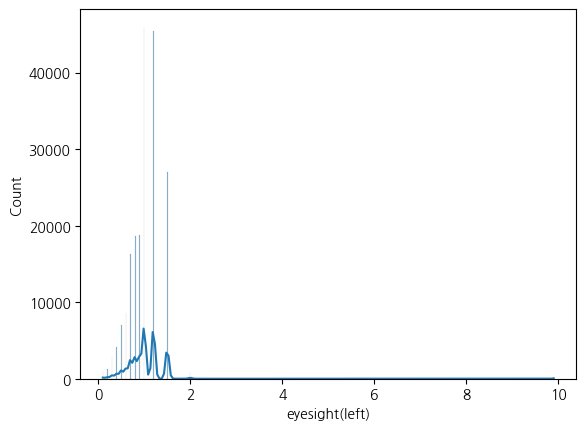

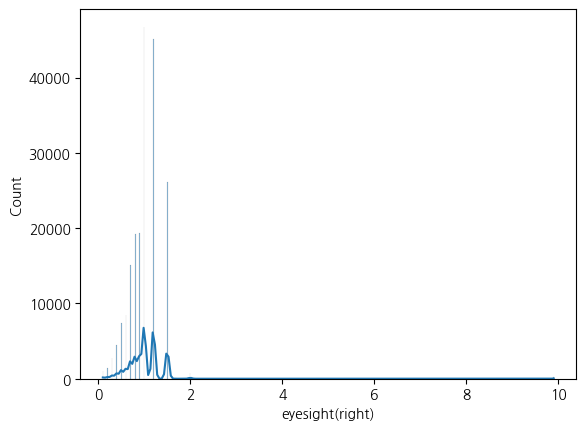

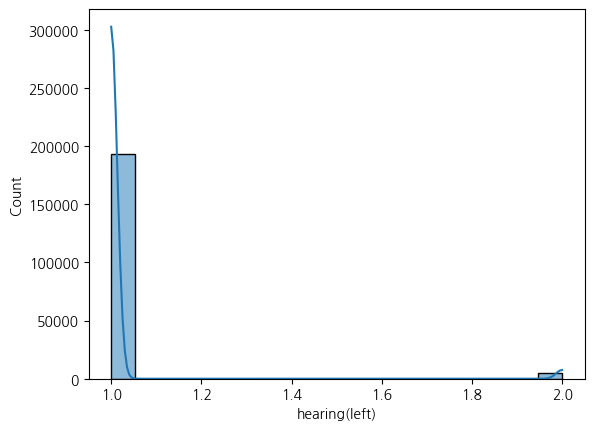

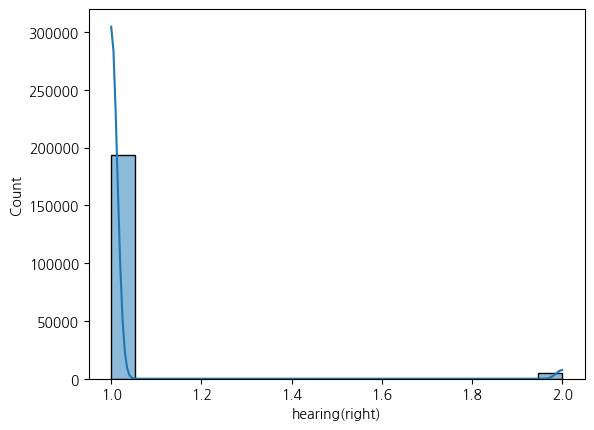

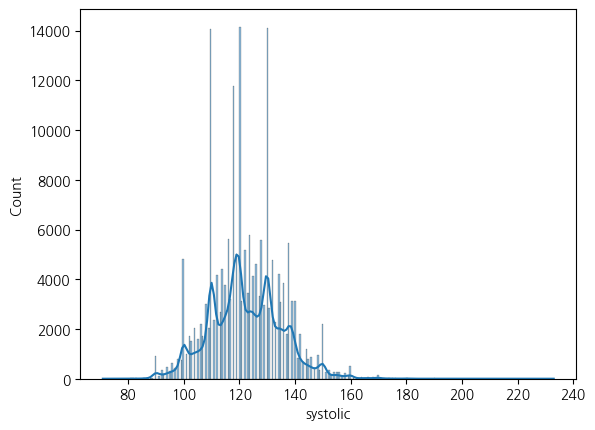

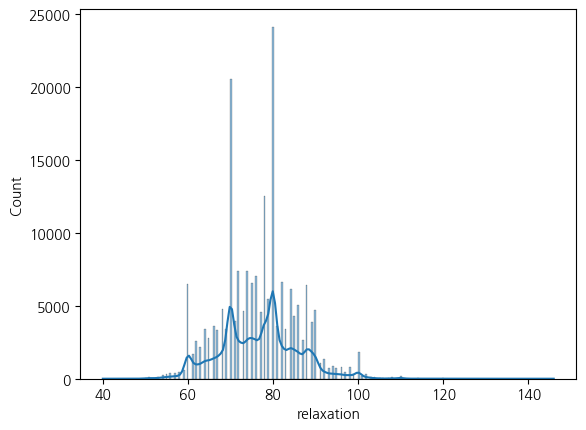

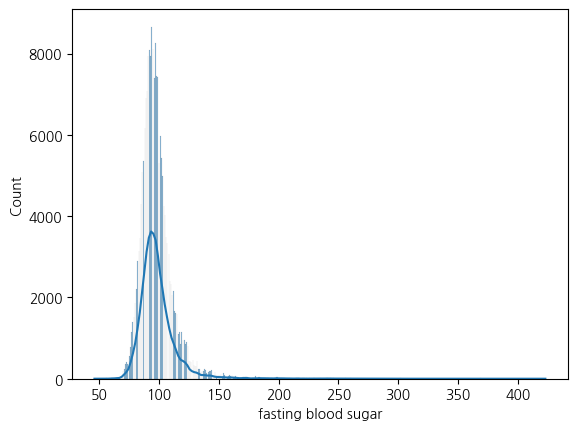

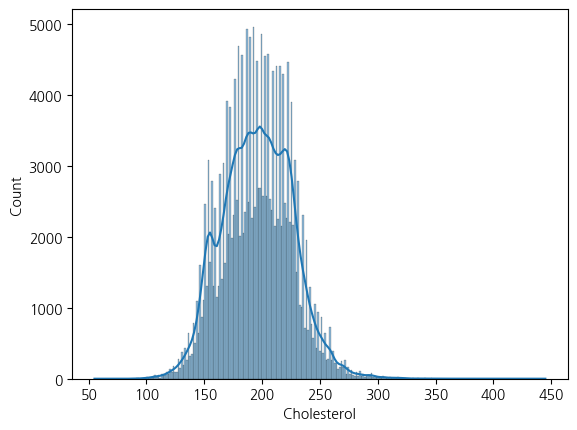

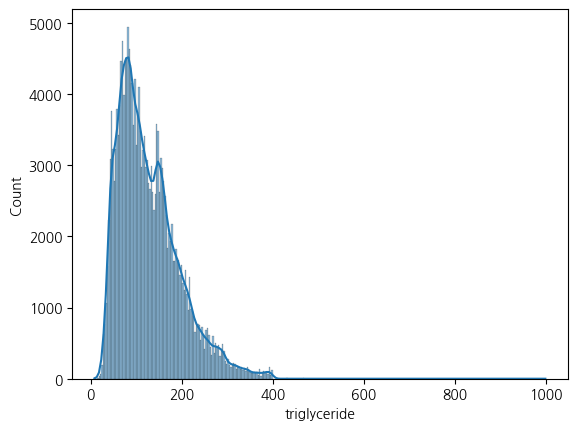

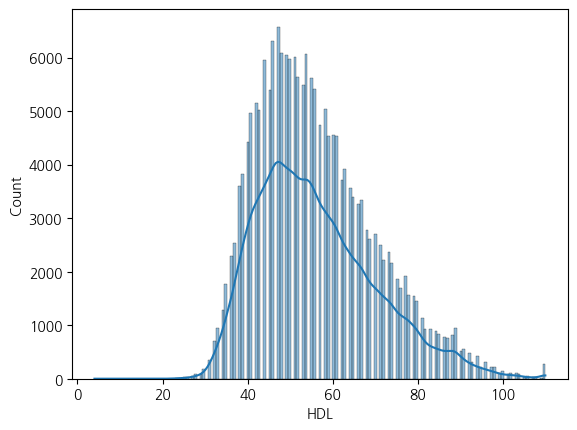

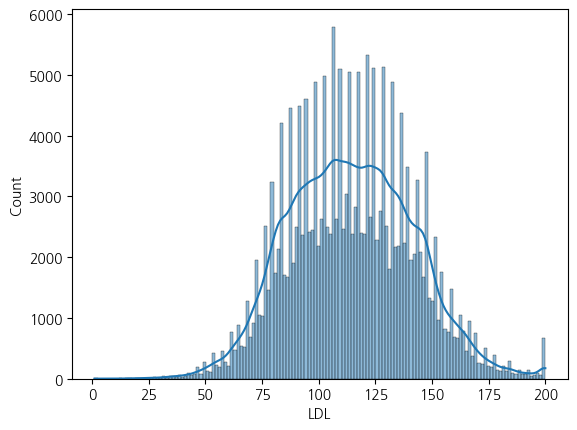

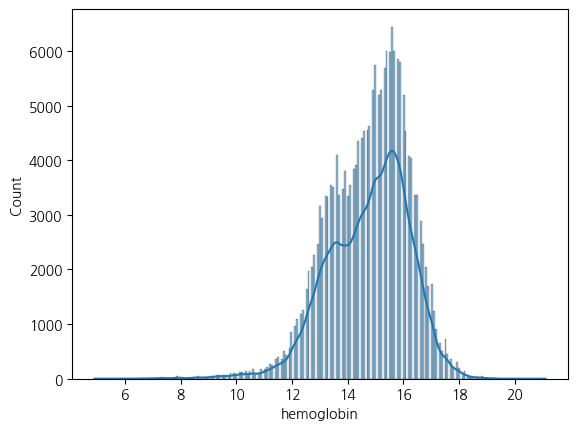

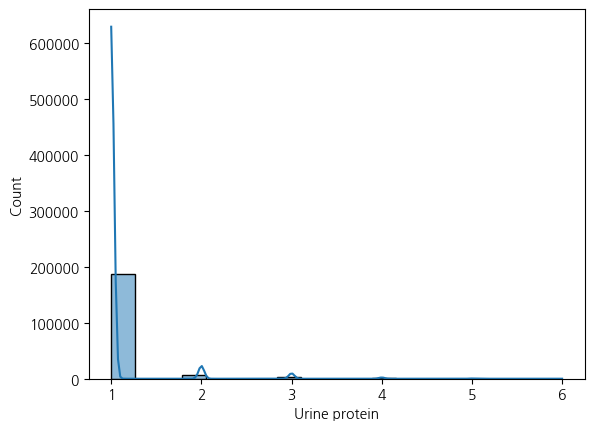

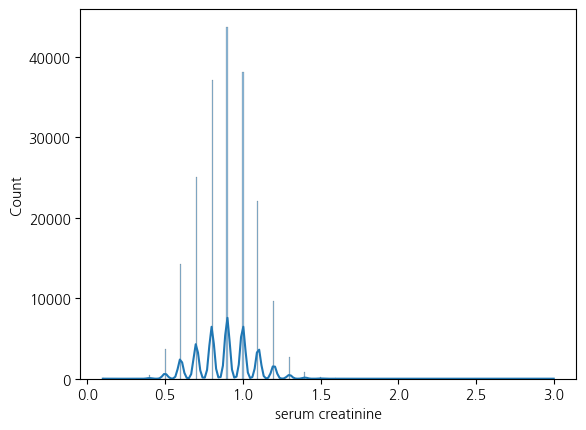

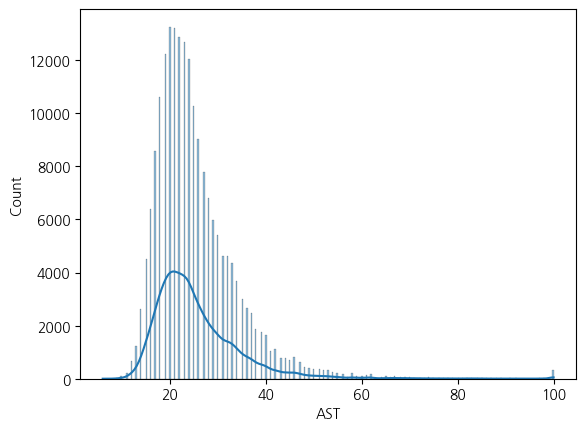

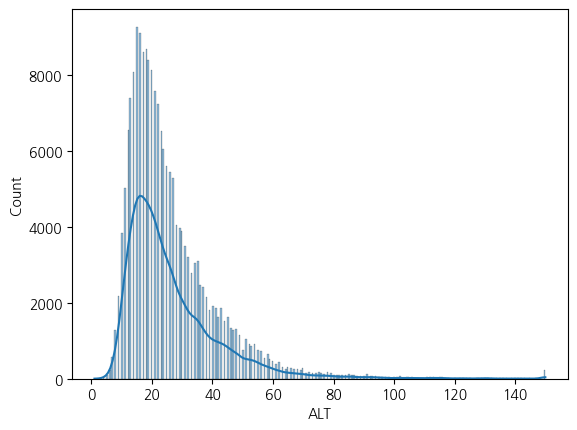

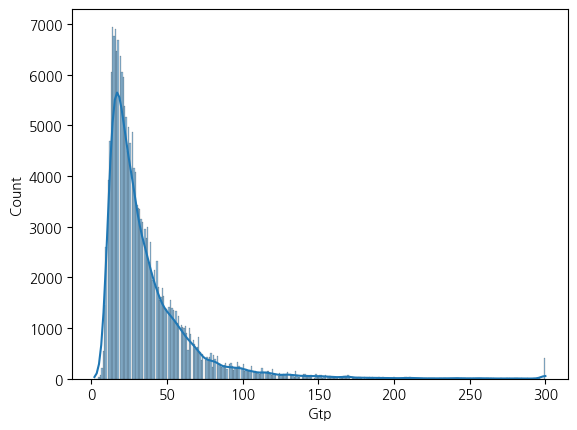

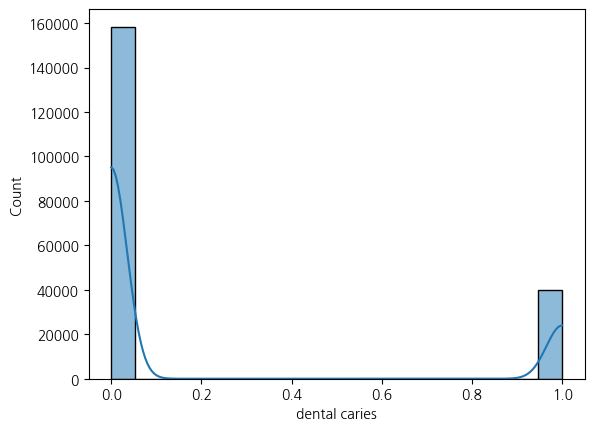

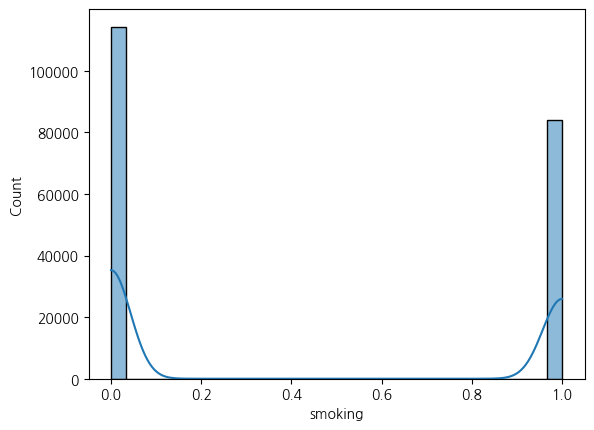

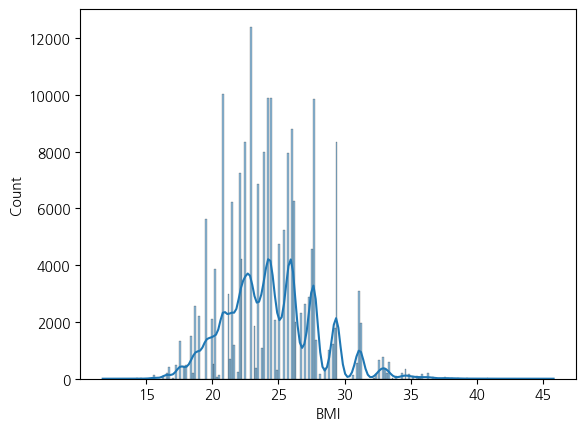

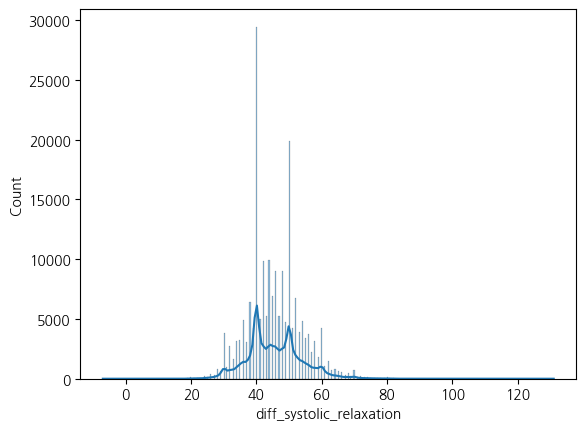

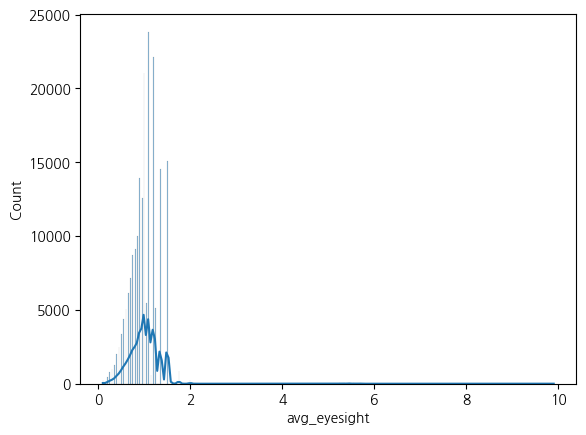

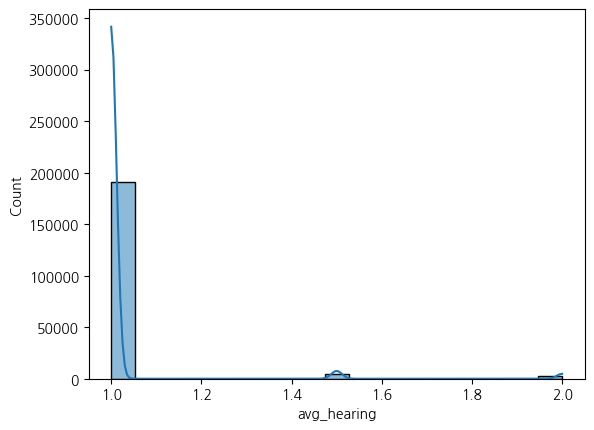

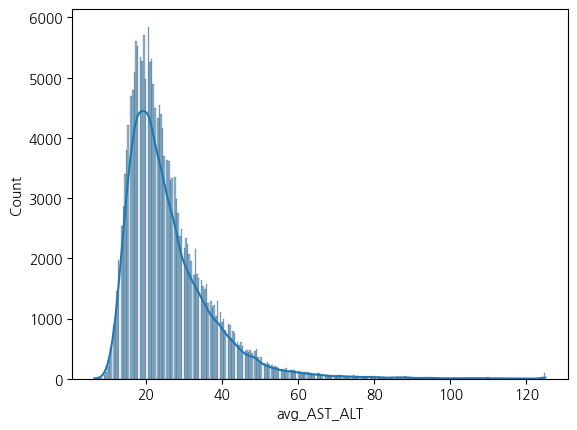

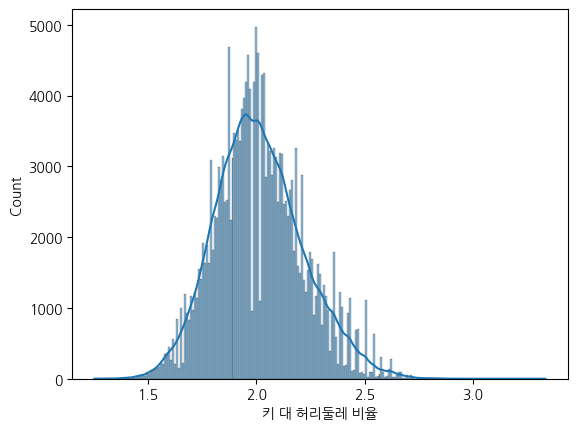

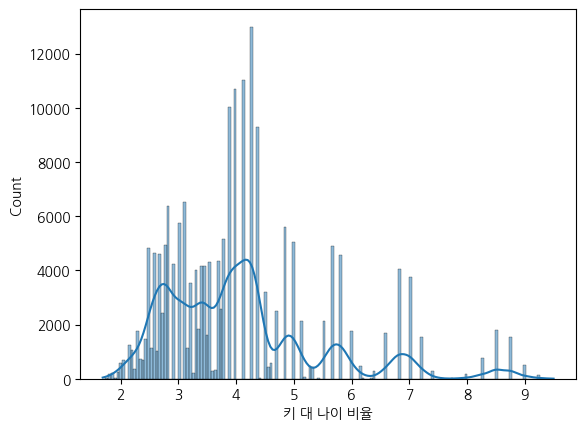

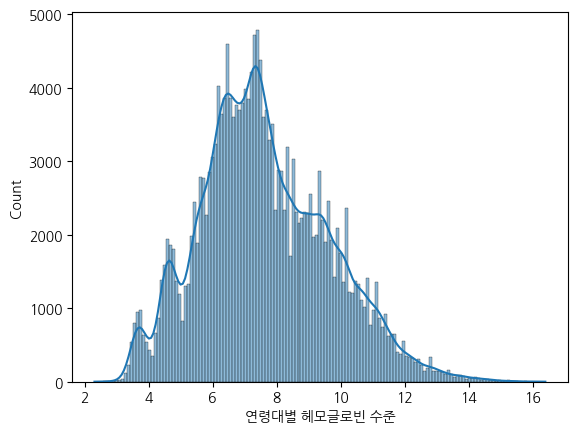

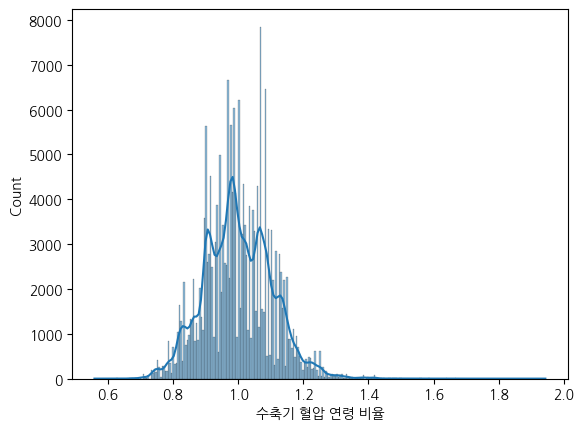

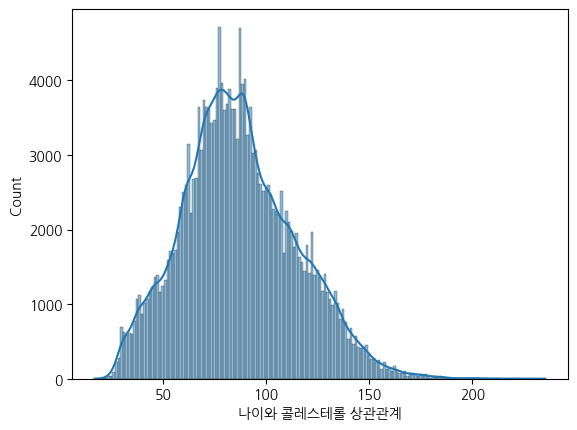

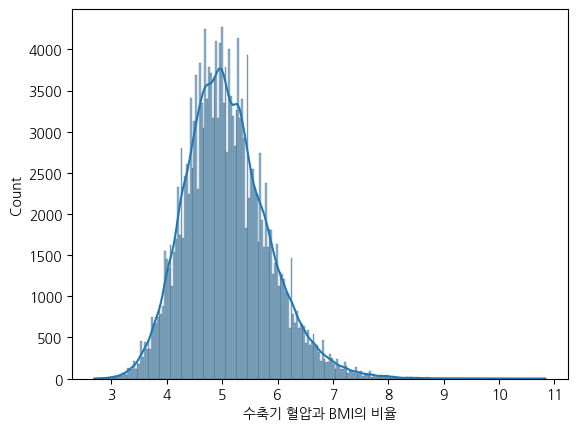

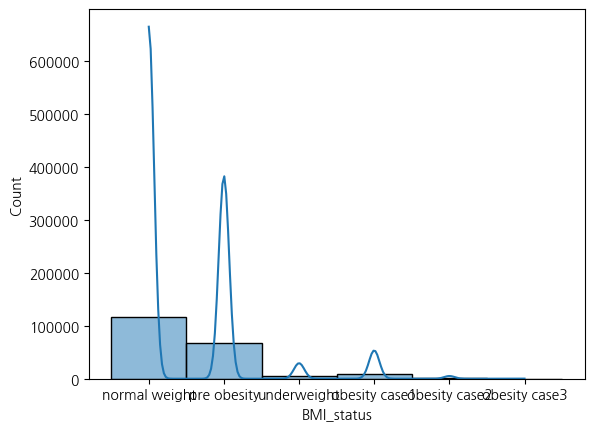

In [15]:
fig, axs = plt.subplots(figsize = (15,6))
for i in col_list:
  sns.histplot(df[i],  kde=True)
  plt.show()

#### Normal distribution으로 변경(Take log)

In [16]:
df["triglyceride"]=np.log1p(df["triglyceride"])
df["AST"]=np.log1p(df["AST"])
df["ALT"]=np.log1p(df["ALT"])
df["Gtp"]=np.log1p(df["Gtp"])
df["avg_AST_ALT"]=np.log1p(df["avg_AST_ALT"])
df["키 대 나이 비율"]=np.log1p(df["키 대 나이 비율"])

### Model

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
def get_rmse(model):
  pred=model.predict(X_test)
  mse=mean_squared_error(y_test,pred)
  rmse=np.sqrt(mse)
  return rmse

def get_rmses(models):
  rmses=[]
  for model in models:
    rmse=get_rmse(model)
    rmses.append(rmse)
  return rmses

In [19]:
# BMI status는 object이므로 삭제
df.drop('BMI_status',axis=1,inplace=True)

In [20]:
y_target = df['smoking']
X_features=df.drop(['smoking'],axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [21]:
X_train.shape

(158592, 33)

In [22]:
X_test.shape

(39648, 33)

In [23]:
y_train.shape

(158592,)

#### 데이터의 scale이 다르기 때문에 StandardSclaer로 정규화

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_scaled_d = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_scaled_d

array([[-2.04488747, -0.01583185,  0.64018706, ...,  1.2815177 ,
        -2.05664612, -0.10285147],
       [-0.78275385, -0.01583185,  0.24540133, ...,  0.25354549,
        -0.76104989, -0.2985361 ],
       [-2.04488747,  1.1078224 , -0.93895585, ..., -1.72332412,
        -2.02765376,  0.6370017 ],
       ...,
       [-1.20346506,  1.66964953,  1.03497278, ...,  0.17447071,
        -1.06003363, -0.08616849],
       [-0.78275385,  1.1078224 ,  0.24540133, ..., -0.14182843,
        -0.69762909,  0.21571414],
       [-0.36204264,  0.54599528, -0.1493844 , ...,  0.09030279,
        -0.02718069,  0.3876365 ]])

#### Linear Regression, Ridge, Lasso

In [27]:
# Linear Regression
lr_reg=LinearRegression()
lr_reg.fit(X_scaled_d, y_train)

LinearRegression()

In [28]:
# Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_scaled_d, y_train)

Ridge()

In [29]:
# Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_scaled_d, y_train)

Lasso()

In [30]:
models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[1193626371738.5193, 3.6440560843958636, 0.49420714712558905]

In [31]:
def get_top_bottom_coef(model, n=5):
  coef=pd.Series(model.coef_, index=X_features.columns)
  coef_high=coef.sort_values(ascending=False).head(n)
  coef_low=coef.sort_values(ascending=False).tail(n)
  return coef_high, coef_low

In [32]:
# 문제 1
lasso_reg.coef_

array([-0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,
       -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,
        0., -0.,  0., -0.,  0., -0., -0.])

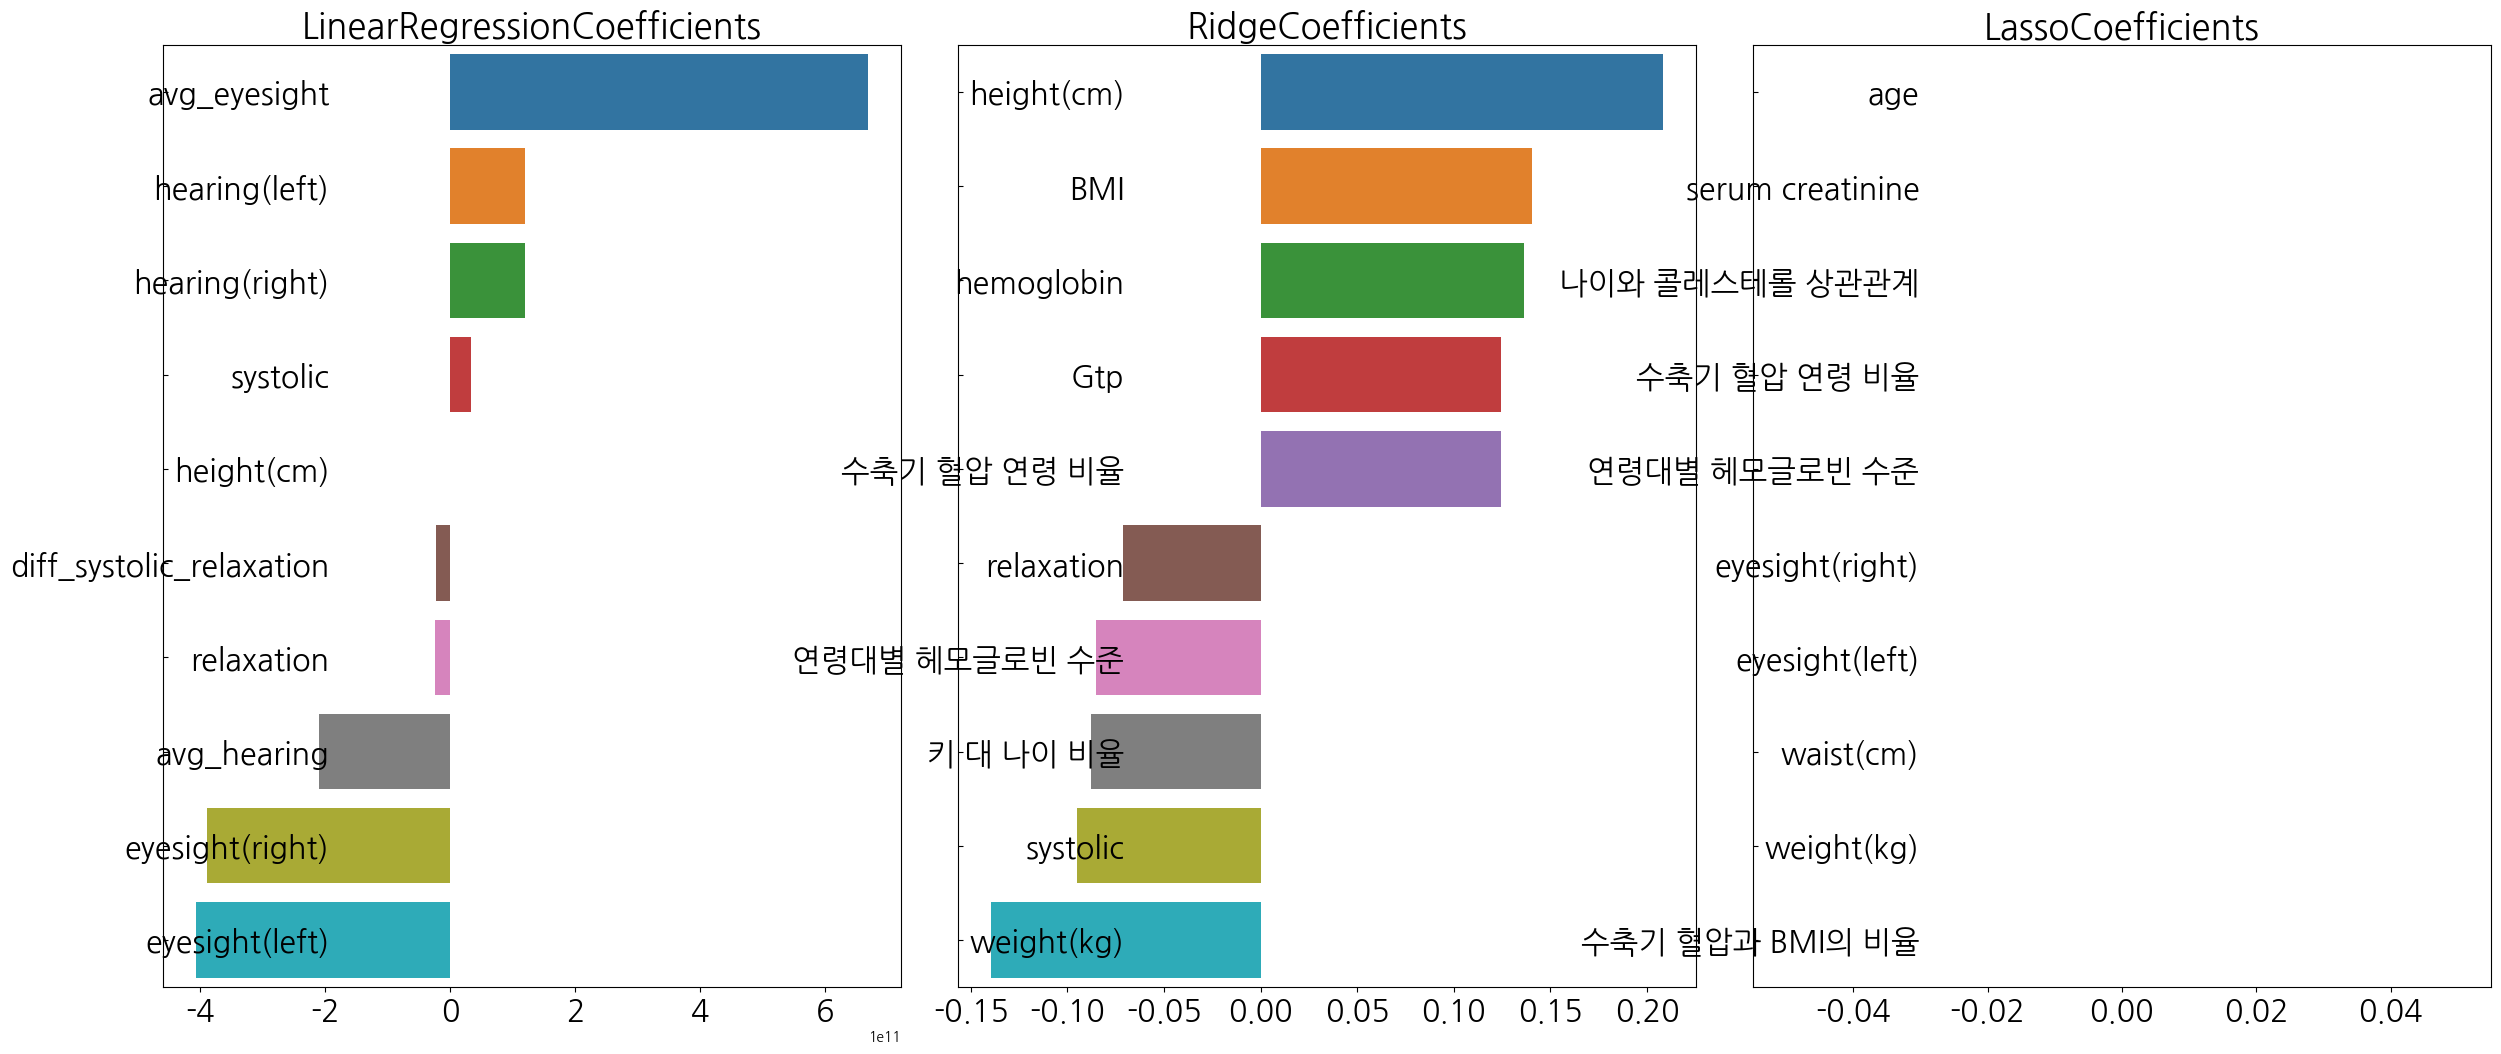

In [33]:
def visualization_coefficient(models):
  fig, axs=plt.subplots(figsize=(24,10), nrows=1, ncols=3)
  fig.tight_layout()

  for i_num, model in enumerate(models):
    coef_high, coef_low=get_top_bottom_coef(model)
    coef_concat=pd.concat([coef_high, coef_low])

    axs[i_num].set_title(model.__class__.__name__ + 'Coefficients', size=25)
    axs[i_num].tick_params(axis='y', direction='in', pad=-120)
    for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
      label.set_fontsize(22)
    sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

models=[lr_reg, ridge_reg, lasso_reg]
visualization_coefficient(models)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
def get_avg_rmse_cv(models):
  for model in models:
    rmse_list=np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5))
    rmse_avg=np.mean(rmse_list)
    print('\n{0} CV RMSE 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
    print('\n{0} CV 평균 RMSE : {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

In [36]:
models=[lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 리스트: [0.403 0.404 0.402 0.401 0.415]

LinearRegression CV 평균 RMSE : 0.405

Ridge CV RMSE 리스트: [0.403 0.404 0.402 0.401 0.415]

Ridge CV 평균 RMSE : 0.405

Lasso CV RMSE 리스트: [0.457 0.458 0.457 0.457 0.453]

Lasso CV 평균 RMSE : 0.456


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
def print_best_params(model, params):
  grid_model=GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=2)
  grid_model.fit(X_features, y_target)
  rmse=np.sqrt(-1*grid_model.best_score_)
  print('{0} 모델 5CV시 최적 평균 RMSE{1}, 최적 alpha: {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

In [39]:
ridge_params={'alpha':[0.05,0.1]}
lasso_params={'alpha':[0.001,0.005]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 모델 5CV시 최적 평균 RMSE0.4051, 최적 alpha: {'alpha': 0.05}
Lasso 모델 5CV시 최적 평균 RMSE0.4062, 최적 alpha: {'alpha': 0.001}


#### LightGBM

In [40]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display = 'diagram')
pipe_lgbm = make_pipeline(StandardScaler(),
                          LGBMRegressor(n_estimate = 400, randomstate=1, metric = 'mse',importance_type='gain'))
pipe_lgbm.fit(X_train, y_train)
pipe_lgbm

[LightGBM] [Warning] Unknown parameter: randomstate
[LightGBM] [Warning] Unknown parameter: n_estimate
[LightGBM] [Warning] Unknown parameter: randomstate
[LightGBM] [Warning] Unknown parameter: n_estimate
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4100
[LightGBM] [Info] Number of data points in the train set: 158592, number of used features: 33
[LightGBM] [Info] Start training from score 0.423451


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(importance_type='gain', metric='mse',
                               n_estimate=400, randomstate=1))])

In [41]:
pipe_lgbm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lgbmregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lgbmregressor__boosting_type', 'lgbmregressor__class_weight', 'lgbmregressor__colsample_bytree', 'lgbmregressor__importance_type', 'lgbmregressor__learning_rate', 'lgbmregressor__max_depth', 'lgbmregressor__min_child_samples', 'lgbmregressor__min_child_weight', 'lgbmregressor__min_split_gain', 'lgbmregressor__n_estimators', 'lgbmregressor__n_jobs', 'lgbmregressor__num_leaves', 'lgbmregressor__objective', 'lgbmregressor__random_state', 'lgbmregressor__reg_alpha', 'lgbmregressor__reg_lambda', 'lgbmregressor__subsample', 'lgbmregressor__subsample_for_bin', 'lgbmregressor__subsample_freq', 'lgbmregressor__n_estimate', 'lgbmregressor__randomstate', 'lgbmregressor__metric'])

In [42]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
param_grid = { 'lgbmregressor__max_depth':[3,5,8],
               'lgbmregressor__learning_rate' : [0.1,0.01],
              'lgbmregressor__min_child_samples' : [1,10,20,30],
              'lgbmregressor__min_child_weight' : [1,3,5]}

gs = GridSearchCV(estimator = pipe_lgbm,
                  cv = 5,  # 5겹 교차검증
                  param_grid = param_grid,
                  refit = True,  # 훈련후 바로 적용
                  return_train_score = True # 훈련 성능 리턴
                  )
gs.fit(X_scaled_d, y_train)
print(f'최적의 하이퍼파라미터 세트:{gs.best_params_}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [43]:
# 모델 성능 평가 함수 생성

def regression_scores(y_true, y_pred) :
  import numpy as np
  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

  MSE = mean_squared_error(y_true, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
  MAE = np.mean( np.abs((y_true - y_pred) / y_true) )
  NMAE =mean_absolute_error(y_true, y_pred)/ np.mean( np.abs(y_true) )
  MAPE = np.mean( np.abs((y_true - y_pred) / y_true) ) *100
  R2 = r2_score(y_true, y_pred)
  return {'MSE' : np.round(MSE, 3),
          'RMSE' : np.round(RMSE, 3),
          'MAE' : np.round(MAE, 3),
          'NMAE' : np.round(NMAE, 3),
          'MAPE' : np.round(MAPE, 3),
          'R2' : np.round(R2, 3)}

In [44]:
# 모델 성능 평가
y_pred = gs.predict(X_test_scaled)
regression_scores(y_test, y_pred)

[LightGBM] [Warning] Unknown parameter: randomstate
[LightGBM] [Warning] Unknown parameter: n_estimate
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


{'MSE': 0.15,
 'RMSE': 0.387,
 'MAE': inf,
 'NMAE': 0.719,
 'MAPE': inf,
 'R2': 0.386}

In [45]:
# 문제 2
import lightgbm as lgb
model = lgb.LGBMRegressor(importance_type='gain')
model.fit(X_scaled_d, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4100
[LightGBM] [Info] Number of data points in the train set: 158592, number of used features: 33
[LightGBM] [Info] Start training from score 0.423451


LGBMRegressor(importance_type='gain')

In [46]:
gain_importance = model.feature_importances_

In [47]:
# 문제2
feature_names = X_features.columns
gain_importance_df = pd.DataFrame({'Feature': feature_names, 'Gain': gain_importance})
print(gain_importance_df.sort_values(by='Gain', ascending=False))

                     Feature          Gain
1                 height(cm)  36676.680948
15                hemoglobin  16949.287326
20                       Gtp  11721.049202
12              triglyceride   4481.407139
28                 키 대 나이 비율   1535.604697
14                       LDL   1447.714252
17          serum creatinine   1357.393857
29             연령대별 헤모글로빈 수준   1261.370215
19                       ALT   1251.962217
31            나이와 콜레스테롤 상관관계    848.675457
22                       BMI    838.359948
21             dental caries    679.630428
18                       AST    593.609990
13                       HDL    553.115882
11               Cholesterol    531.583050
26               avg_AST_ALT    473.109845
9                 relaxation    436.004991
0                        age    421.168768
10       fasting blood sugar    409.038763
8                   systolic    379.768738
27               키 대 허리둘레 비율    197.400279
3                  waist(cm)    167.106901
23  diff_sy

In [48]:
y_pred = model.predict(X_test_scaled)
regression_scores(y_test, y_pred)

{'MSE': 0.15,
 'RMSE': 0.387,
 'MAE': inf,
 'NMAE': 0.719,
 'MAPE': inf,
 'R2': 0.385}

#### XGBoost Regressor

In [49]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(X_scaled_d,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

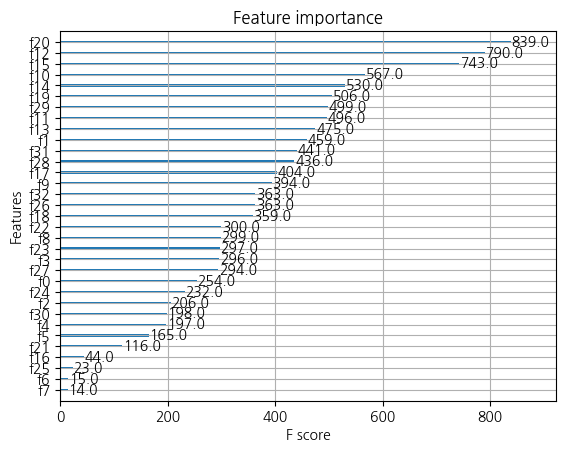

In [50]:
xgboost.plot_importance(xgb_model)

In [51]:
y_pred = xgb_model.predict(X_test_scaled)
regression_scores(y_test, y_pred)

{'MSE': 0.149,
 'RMSE': 0.386,
 'MAE': inf,
 'NMAE': 0.714,
 'MAPE': inf,
 'R2': 0.389}